In [1]:
%pylab inline
import mdtraj as md
import pandas as pd
import itertools

Populating the interactive namespace from numpy and matplotlib


In [2]:
liganded = md.load('../strutures/liganded.pdb')
unliganded = md.load('../strutures/unboundgp120.pdb')

In [3]:
ca_index = unliganded.topology.select('name CA')
# liganded.topology.select('name CA') == unliganded.topology.select('name CA')

In [4]:
pairs = np.array(list(itertools.product(ca_index, ca_index)))

In [5]:
unliganded_dm = md.compute_distances(unliganded, atom_pairs=pairs)
liganded_dm = md.compute_distances(liganded, atom_pairs=pairs)

In [6]:
cutoff = 0.8

unliganded_i = np.where(unliganded_dm[0,:]<cutoff)[0]
liganded_i = np.where(liganded_dm[0,:]<cutoff)[0]

print 'distance pairs in unliganded: %d' % unliganded_i.shape[0]
print 'distance pairs in liganded: %d' % liganded_i.shape[0]

distance pairs in unliganded: 4770
distance pairs in liganded: 4742


In [40]:
unliganded_cm = []
unliganded_pair_i = []
for i in unliganded_i:
    x = unliganded.topology.atom(pairs[i][0]).residue.index
    y = unliganded.topology.atom(pairs[i][1]).residue.index
    if x < y:
        temp = (x,y)
    else:
        temp = (y,x)
    if temp not in unliganded_cm:
        unliganded_cm.append(temp)
        unliganded_pair_i.append(i)
print 'contact in unliganded: %d' % len(unliganded_cm)

liganded_cm = []
liganded_pair_i = []
for i in liganded_i:
    x = liganded.topology.atom(pairs[i][0]).residue.index
    y = liganded.topology.atom(pairs[i][1]).residue.index
    if x > y:
        temp = (x,y)
    else:
        temp = (y,x)
    if temp not in liganded_cm:
        liganded_cm.append(temp)
        liganded_pair_i.append(i)
print 'contact in unliganded: %d' % len(liganded_cm)

contact in unliganded: 2616
contact in unliganded: 2602


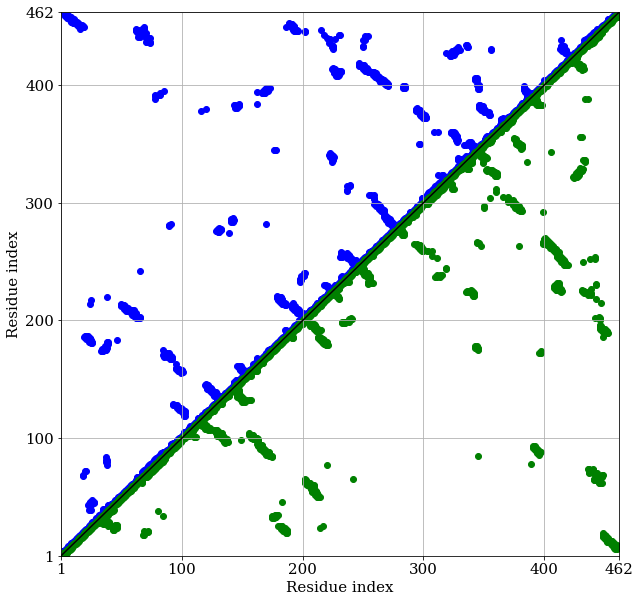

In [41]:
rc('font', family='serif', size=15)

figure(figsize=(10,10))
scatter(list(vstack(unliganded_cm)[:,0]),list(vstack(unliganded_cm)[:,1]),c='b')
scatter(list(vstack(liganded_cm)[:,0]),list(vstack(liganded_cm)[:,1]),c='g')
plot([0,len(ca_index)],[0,len(ca_index)],c='k')
xlim(0,len(ca_index))
xticks([0,100,200,300,400,len(ca_index)],['1','100','200','300','400',str(len(ca_index))])
xlabel('Residue index')
ylim(0,len(ca_index))
yticks([0,100,200,300,400,len(ca_index)],['1','100','200','300','400',str(len(ca_index))])
ylabel('Residue index')
grid()

In [42]:
unliganded_cm_only = []
unliganded_i_only = []

for i in unliganded_pair_i:    
    x = unliganded.topology.atom(pairs[i][0]).residue.index
    y = unliganded.topology.atom(pairs[i][1]).residue.index
    
    if (x,y) not in liganded_cm and (y,x) not in liganded_cm:
        if x<y and (x,y) not in unliganded_cm_only:
            unliganded_cm_only.append((x,y))
            unliganded_i_only.append(i)
        if x>y and (y,x) not in unliganded_cm_only:
            unliganded_cm_only.append((y,x))
            unliganded_i_only.append(i)
print len(unliganded_cm_only)

liganded_cm_only = []
liganded_i_only = []

for i in liganded_pair_i:
    x = liganded.topology.atom(pairs[i][0]).residue.index
    y = liganded.topology.atom(pairs[i][1]).residue.index
    
    if (x,y) not in unliganded_cm and (y,x) not in unliganded_cm:
        if x>y and (x,y) not in liganded_cm_only:
            liganded_cm_only.append((x,y))
            liganded_i_only.append(i)
        if x<y and (y,x) not in liganded_cm_only:
            liganded_cm_only.append((y,x))
            liganded_i_only.append(i)
        
print len(liganded_cm_only)

411
397


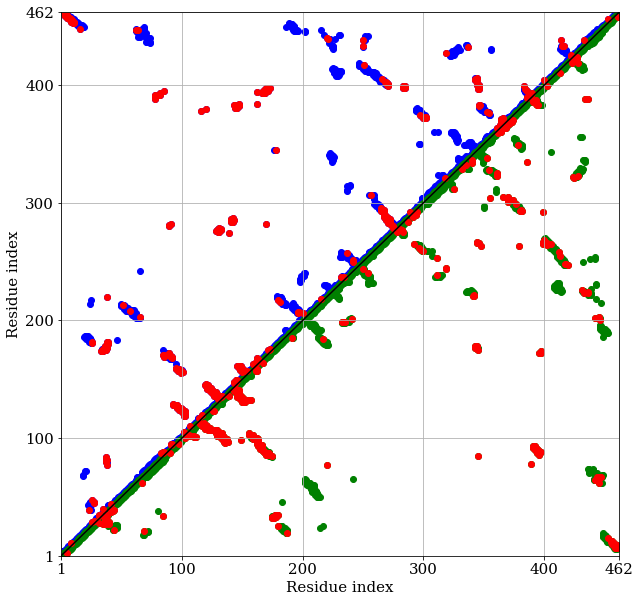

In [43]:
rc('font', family='serif', size=15)

figure(figsize=(10,10))
scatter(list(vstack(unliganded_cm)[:,0]),list(vstack(unliganded_cm)[:,1]),c='b')
scatter(list(vstack(liganded_cm)[:,0]),list(vstack(liganded_cm)[:,1]),c='g')
scatter(list(vstack(unliganded_cm_only)[:,0]),list(vstack(unliganded_cm_only)[:,1]),c='r')
scatter(list(vstack(liganded_cm_only)[:,0]),list(vstack(liganded_cm_only)[:,1]),c='r')
plot([0,len(ca_index)],[0,len(ca_index)],c='k')
xlim(0,len(ca_index))
xticks([0,100,200,300,400,len(ca_index)],['1','100','200','300','400',str(len(ca_index))])
xlabel('Residue index')
ylim(0,len(ca_index))
yticks([0,100,200,300,400,len(ca_index)],['1','100','200','300','400',str(len(ca_index))])
ylabel('Residue index')
grid()

# need to driver

In [44]:
top_unliganded_ca = {'VAL1':5,'GLU2':21,'LYS3':36,'LEU4':58,'TRP5':77,'VAL6':101,'THR7':117,'VAL8':131,'TYR9':147,'TYR10':168,'GLY11':189,'VAL12':196,'PRO13':220,'VAL14':226,'TRP15':242,'LYS16':266,'GLU17':288,'ALA18':303,'THR19':313,'THR20':327,'THR21':341,'LEU22':355,'PHE23':374,'CYS24':394,'ALA25':404,'SER26':414,'ASP27':425,'ALA28':437,'LYS29':447,'ALA30':469,'TYR31':479,'ASP32':500,'THR33':512,'GLU34':526,'VAL35':541,'HIS36':557,'ASN37':574,'VAL38':588,'TRP39':604,'ALA40':628,'THR41':638,'HIS42':652,'ALA43':669,'CYS44':679,'VAL45':689,'PRO46':713,'THR47':719,'ASP48':733,'PRO49':753,'ASN50':759,'PRO51':781,'GLN52':787,'GLU53':804,'VAL54':819,'VAL55':835,'LEU56':851,'GLU57':870,'ASN58':885,'VAL59':899,'THR60':915,'GLU61':929,'HIS62':944,'PHE63':961,'ASN64':981,'MET65':995,'TRP66':1012,'LYS67':1036,'ASN68':1058,'ASN69':1072,'MET70':1086,'VAL71':1103,'GLU72':1119,'GLN73':1134,'MET74':1151,'GLN75':1168,'GLU76':1185,'ASP77':1200,'ILE78':1212,'ILE79':1231,'SER80':1250,'LEU81':1261,'TRP82':1280,'ASP83':1304,'GLN84':1316,'SER85':1333,'LEU86':1344,'LYS87':1363,'PRO88':1393,'CYS89':1399,'VAL90':1409,'LYS91':1425,'LEU92':1447,'THR93':1466,'PRO94':1488,'LEU95':1494,'CYS96':1513,'VAL97':1523,'THR98':1539,'LEU99':1553,'ASN100':1572,'CYS101':1586,'LYS102':1596,'ASP103':1618,'VAL104':1630,'ASN105':1646,'ALA106':1660,'THR107':1670,'ASN108':1684,'THR109':1698,'THR110':1712,'ASN111':1726,'ASP112':1740,'SER113':1752,'GLU114':1763,'GLY115':1778,'THR116':1785,'MET117':1799,'GLU118':1816,'ARG119':1831,'GLY120':1855,'GLU121':1862,'ILE122':1877,'LYS123':1896,'ASN124':1918,'CYS125':1932,'SER126':1942,'PHE127':1953,'ASN128':1973,'ILE129':1987,'THR130':2006,'THR131':2020,'SER132':2034,'ILE133':2045,'ARG134':2064,'ASP135':2088,'GLU136':2100,'VAL137':2115,'GLN138':2131,'LYS139':2148,'GLU140':2170,'TYR141':2185,'ALA142':2206,'LEU143':2216,'PHE144':2235,'TYR145':2255,'LYS146':2276,'LEU147':2298,'ASP148':2317,'VAL149':2329,'VAL150':2345,'PRO151':2369,'ILE152':2375,'ASP153':2394,'ASN154':2406,'ASN155':2420,'ASN156':2434,'THR157':2448,'SER158':2462,'TYR159':2473,'ARG160':2494,'LEU161':2518,'ILE162':2537,'SER163':2556,'CYS164':2567,'ASP165':2577,'THR166':2589,'SER167':2603,'VAL168':2614,'ILE169':2630,'THR170':2649,'GLN171':2663,'ALA172':2680,'CYS173':2690,'PRO174':2708,'LYS175':2714,'ILE176':2736,'SER177':2755,'PHE178':2766,'GLU179':2786,'PRO180':2809,'ILE181':2815,'PRO182':2842,'ILE183':2848,'HIS184':2867,'TYR185':2884,'CYS186':2905,'ALA187':2915,'PRO188':2933,'ALA189':2939,'GLY190':2949,'PHE191':2956,'ALA192':2976,'ILE193':2986,'LEU194':3005,'LYS195':3024,'CYS196':3046,'ASN197':3056,'ASP198':3070,'LYS199':3082,'THR200':3104,'PHE201':3118,'ASN202':3138,'GLY203':3152,'LYS204':3159,'GLY205':3181,'PRO206':3196,'CYS207':3202,'LYS208':3212,'ASN209':3234,'VAL210':3248,'SER211':3264,'THR212':3275,'VAL213':3289,'GLN214':3305,'CYS215':3322,'THR216':3332,'HIS217':3346,'GLY218':3363,'ILE219':3370,'ARG220':3389,'PRO221':3421,'VAL222':3427,'VAL223':3443,'SER224':3459,'THR225':3470,'GLN226':3484,'LEU227':3501,'LEU228':3520,'LEU229':3539,'ASN230':3558,'GLY231':3572,'SER232':3579,'LEU233':3590,'ALA234':3609,'GLU235':3619,'GLU236':3634,'GLU237':3649,'VAL238':3664,'VAL239':3680,'ILE240':3696,'ARG241':3715,'SER242':3739,'ASP243':3750,'ASN244':3762,'PHE245':3776,'THR246':3796,'ASN247':3810,'ASN248':3824,'ALA249':3838,'LYS250':3848,'THR251':3870,'ILE252':3884,'ILE253':3903,'VAL254':3922,'GLN255':3938,'LEU256':3955,'LYS257':3974,'GLU258':3996,'SER259':4011,'VAL260':4022,'GLU261':4038,'ILE262':4053,'ASN263':4072,'CYS264':4086,'THR265':4096,'ARG266':4110,'PRO267':4142,'ASN268':4148,'ASN269':4162,'ASN270':4176,'THR271':4190,'ARG272':4204,'LYS273':4228,'SER274':4250,'ILE275':4261,'HIS276':4280,'ILE277':4297,'GLY278':4316,'PRO279':4331,'GLY280':4337,'ARG281':4344,'ALA282':4368,'PHE283':4378,'TYR284':4398,'THR285':4419,'THR286':4433,'GLY287':4447,'GLU288':4454,'ILE289':4469,'ILE290':4488,'GLY291':4507,'ASP292':4514,'ILE293':4526,'ARG294':4545,'GLN295':4569,'ALA296':4586,'HIS297':4596,'CYS298':4613,'ASN299':4623,'ILE300':4637,'SER301':4656,'ARG302':4667,'ALA303':4691,'LYS304':4701,'TRP305':4723,'ASN306':4747,'ASP307':4761,'THR308':4773,'LEU309':4787,'LYS310':4806,'GLN311':4828,'ILE312':4845,'VAL313':4864,'ILE314':4880,'LYS315':4899,'LEU316':4921,'ARG317':4940,'GLU318':4964,'GLN319':4979,'PHE320':4996,'GLU321':5016,'ASN322':5031,'LYS323':5045,'THR324':5067,'ILE325':5081,'VAL326':5100,'PHE327':5116,'ASN328':5136,'HIS329':5150,'SER330':5167,'SER331':5178,'GLY332':5189,'GLY333':5196,'ASP334':5203,'PRO335':5223,'GLU336':5229,'ILE337':5244,'VAL338':5263,'MET339':5279,'HIS340':5296,'SER341':5313,'PHE342':5324,'ASN343':5344,'CYS344':5358,'GLY345':5368,'GLY346':5375,'GLU347':5382,'PHE348':5397,'PHE349':5417,'TYR350':5437,'CYS351':5458,'ASN352':5468,'SER353':5482,'THR354':5493,'GLN355':5507,'LEU356':5524,'PHE357':5543,'ASN358':5563,'SER359':5577,'THR360':5588,'TRP361':5602,'ASN362':5626,'ASN363':5640,'ASN364':5654,'THR365':5668,'GLU366':5682,'GLY367':5697,'SER368':5704,'ASN369':5715,'ASN370':5729,'THR371':5743,'GLU372':5757,'GLY373':5772,'ASN374':5779,'THR375':5793,'ILE376':5807,'THR377':5826,'LEU378':5840,'PRO379':5867,'CYS380':5873,'ARG381':5883,'ILE382':5907,'LYS383':5926,'GLN384':5948,'ILE385':5965,'ILE386':5984,'ASN387':6003,'MET388':6017,'TRP389':6034,'GLN390':6058,'GLU391':6075,'VAL392':6090,'GLY393':6106,'LYS394':6113,'ALA395':6135,'MET396':6145,'TYR397':6162,'ALA398':6183,'PRO399':6201,'PRO400':6215,'ILE401':6221,'ARG402':6240,'GLY403':6264,'GLN404':6271,'ILE405':6288,'ARG406':6307,'CYS407':6331,'SER408':6341,'SER409':6352,'ASN410':6363,'ILE411':6377,'THR412':6396,'GLY413':6410,'LEU414':6417,'LEU415':6436,'LEU416':6455,'THR417':6474,'ARG418':6488,'ASP419':6512,'GLY420':6524,'GLY421':6531,'ILE422':6538,'ASN423':6557,'GLU424':6571,'ASN425':6586,'GLY426':6600,'THR427':6607,'GLU428':6621,'ILE429':6636,'PHE430':6655,'ARG431':6675,'PRO432':6707,'GLY433':6713,'GLY434':6720,'GLY435':6727,'ASP436':6734,'MET437':6746,'ARG438':6763,'ASP439':6787,'ASN440':6799,'TRP441':6813,'ARG442':6837,'SER443':6861,'GLU444':6872,'LEU445':6887,'TYR446':6906,'LYS447':6927,'TYR448':6949,'LYS449':6970,'VAL450':6992,'VAL451':7008,'LYS452':7024,'ILE453':7046,'GLU454':7065,'PRO455':7088,'LEU456':7094,'GLY457':7113,'VAL458':7120,'ALA459':7136,'PRO460':7154,'THR461':7160,'LYS462':7174}
top_liganded_ca = {'VAL1':5,'GLU2':21,'LYS3':36,'LEU4':58,'TRP5':77,'VAL6':101,'THR7':117,'VAL8':131,'TYR9':147,'TYR10':168,'GLY11':189,'VAL12':196,'PRO13':220,'VAL14':226,'TRP15':242,'LYS16':266,'GLU17':288,'ALA18':303,'THR19':313,'THR20':327,'THR21':341,'LEU22':355,'PHE23':374,'CYS24':394,'ALA25':405,'SER26':415,'ASP27':426,'ALA28':438,'LYS29':448,'ALA30':470,'TYR31':480,'ASP32':501,'THR33':513,'GLU34':527,'VAL35':542,'HIS36':558,'ASN37':575,'VAL38':589,'TRP39':605,'ALA40':629,'THR41':639,'HIS42':653,'ALA43':670,'CYS44':680,'VAL45':691,'PRO46':715,'THR47':721,'ASP48':735,'PRO49':755,'ASN50':761,'PRO51':783,'GLN52':789,'GLU53':806,'VAL54':821,'VAL55':837,'LEU56':853,'GLU57':872,'ASN58':887,'VAL59':901,'THR60':917,'GLU61':931,'HIS62':946,'PHE63':963,'ASN64':983,'MET65':997,'TRP66':1014,'LYS67':1038,'ASN68':1060,'ASN69':1074,'MET70':1088,'VAL71':1105,'GLU72':1121,'GLN73':1136,'MET74':1153,'GLN75':1170,'GLU76':1187,'ASP77':1202,'ILE78':1214,'ILE79':1233,'SER80':1252,'LEU81':1263,'TRP82':1282,'ASP83':1306,'GLN84':1318,'SER85':1335,'LEU86':1346,'LYS87':1365,'PRO88':1395,'CYS89':1401,'VAL90':1411,'LYS91':1427,'LEU92':1449,'THR93':1468,'PRO94':1490,'LEU95':1496,'CYS96':1515,'VAL97':1526,'THR98':1542,'LEU99':1556,'ASN100':1575,'CYS101':1589,'LYS102':1600,'ASP103':1622,'VAL104':1634,'ASN105':1650,'ALA106':1664,'THR107':1674,'ASN108':1688,'THR109':1702,'THR110':1716,'ASN111':1730,'ASP112':1744,'SER113':1756,'GLU114':1767,'GLY115':1782,'THR116':1789,'MET117':1803,'GLU118':1820,'ARG119':1835,'GLY120':1859,'GLU121':1866,'ILE122':1881,'LYS123':1900,'ASN124':1922,'CYS125':1936,'SER126':1947,'PHE127':1958,'ASN128':1978,'ILE129':1992,'THR130':2011,'THR131':2025,'SER132':2039,'ILE133':2050,'ARG134':2069,'ASP135':2093,'GLU136':2105,'VAL137':2120,'GLN138':2136,'LYS139':2153,'GLU140':2175,'TYR141':2190,'ALA142':2211,'LEU143':2221,'PHE144':2240,'TYR145':2260,'LYS146':2281,'LEU147':2303,'ASP148':2322,'VAL149':2334,'VAL150':2350,'PRO151':2374,'ILE152':2380,'ASP153':2399,'ASN154':2411,'ASN155':2425,'ASN156':2439,'THR157':2453,'SER158':2467,'TYR159':2478,'ARG160':2499,'LEU161':2523,'ILE162':2542,'SER163':2561,'CYS164':2572,'ASP165':2583,'THR166':2595,'SER167':2609,'VAL168':2620,'ILE169':2636,'THR170':2655,'GLN171':2669,'ALA172':2686,'CYS173':2696,'PRO174':2714,'LYS175':2720,'ILE176':2742,'SER177':2761,'PHE178':2772,'GLU179':2792,'PRO180':2815,'ILE181':2821,'PRO182':2848,'ILE183':2854,'HIS184':2873,'TYR185':2890,'CYS186':2911,'ALA187':2921,'PRO188':2939,'ALA189':2945,'GLY190':2955,'PHE191':2962,'ALA192':2982,'ILE193':2992,'LEU194':3011,'LYS195':3030,'CYS196':3052,'ASN197':3062,'ASP198':3076,'LYS199':3088,'THR200':3110,'PHE201':3124,'ASN202':3144,'GLY203':3158,'LYS204':3165,'GLY205':3187,'PRO206':3202,'CYS207':3208,'LYS208':3218,'ASN209':3240,'VAL210':3254,'SER211':3270,'THR212':3281,'VAL213':3295,'GLN214':3311,'CYS215':3328,'THR216':3338,'HIS217':3352,'GLY218':3370,'ILE219':3377,'ARG220':3396,'PRO221':3428,'VAL222':3434,'VAL223':3450,'SER224':3466,'THR225':3477,'GLN226':3491,'LEU227':3508,'LEU228':3527,'LEU229':3546,'ASN230':3565,'GLY231':3579,'SER232':3586,'LEU233':3597,'ALA234':3616,'GLU235':3626,'GLU236':3641,'GLU237':3656,'VAL238':3671,'VAL239':3687,'ILE240':3703,'ARG241':3722,'SER242':3746,'ASP243':3757,'ASN244':3769,'PHE245':3783,'THR246':3803,'ASN247':3817,'ASN248':3831,'ALA249':3845,'LYS250':3855,'THR251':3877,'ILE252':3891,'ILE253':3910,'VAL254':3929,'GLN255':3945,'LEU256':3962,'LYS257':3981,'GLU258':4003,'SER259':4018,'VAL260':4029,'GLU261':4045,'ILE262':4060,'ASN263':4079,'CYS264':4093,'THR265':4103,'ARG266':4117,'PRO267':4149,'ASN268':4155,'ASN269':4169,'ASN270':4183,'THR271':4197,'ARG272':4211,'LYS273':4235,'SER274':4257,'ILE275':4268,'HIS276':4287,'ILE277':4304,'GLY278':4323,'PRO279':4338,'GLY280':4344,'ARG281':4351,'ALA282':4375,'PHE283':4385,'TYR284':4405,'THR285':4426,'THR286':4440,'GLY287':4454,'GLU288':4461,'ILE289':4476,'ILE290':4495,'GLY291':4514,'ASP292':4521,'ILE293':4533,'ARG294':4552,'GLN295':4576,'ALA296':4593,'HIS297':4603,'CYS298':4620,'ASN299':4630,'ILE300':4644,'SER301':4663,'ARG302':4674,'ALA303':4698,'LYS304':4708,'TRP305':4730,'ASN306':4754,'ASP307':4768,'THR308':4780,'LEU309':4794,'LYS310':4813,'GLN311':4835,'ILE312':4852,'VAL313':4871,'ILE314':4887,'LYS315':4906,'LEU316':4928,'ARG317':4947,'GLU318':4971,'GLN319':4986,'PHE320':5003,'GLU321':5023,'ASN322':5038,'LYS323':5052,'THR324':5074,'ILE325':5088,'VAL326':5107,'PHE327':5123,'ASN328':5143,'HIS329':5157,'SER330':5174,'SER331':5185,'GLY332':5196,'GLY333':5203,'ASP334':5210,'PRO335':5230,'GLU336':5236,'ILE337':5251,'VAL338':5270,'MET339':5286,'HIS340':5303,'SER341':5320,'PHE342':5331,'ASN343':5351,'CYS344':5365,'GLY345':5375,'GLY346':5382,'GLU347':5389,'PHE348':5404,'PHE349':5424,'TYR350':5444,'CYS351':5465,'ASN352':5475,'SER353':5489,'THR354':5500,'GLN355':5514,'LEU356':5531,'PHE357':5550,'ASN358':5570,'SER359':5584,'THR360':5595,'TRP361':5609,'ASN362':5633,'ASN363':5647,'ASN364':5661,'THR365':5675,'GLU366':5689,'GLY367':5704,'SER368':5711,'ASN369':5722,'ASN370':5736,'THR371':5750,'GLU372':5764,'GLY373':5779,'ASN374':5786,'THR375':5800,'ILE376':5814,'THR377':5833,'LEU378':5847,'PRO379':5874,'CYS380':5880,'ARG381':5890,'ILE382':5914,'LYS383':5933,'GLN384':5955,'ILE385':5972,'ILE386':5991,'ASN387':6010,'MET388':6024,'TRP389':6041,'GLN390':6065,'GLU391':6082,'VAL392':6097,'GLY393':6113,'LYS394':6120,'ALA395':6142,'MET396':6152,'TYR397':6169,'ALA398':6190,'PRO399':6208,'PRO400':6222,'ILE401':6228,'ARG402':6247,'GLY403':6271,'GLN404':6278,'ILE405':6295,'ARG406':6314,'CYS407':6338,'SER408':6348,'SER409':6359,'ASN410':6370,'ILE411':6384,'THR412':6403,'GLY413':6417,'LEU414':6424,'LEU415':6443,'LEU416':6462,'THR417':6481,'ARG418':6495,'ASP419':6519,'GLY420':6531,'GLY421':6538,'ILE422':6545,'ASN423':6564,'GLU424':6578,'ASN425':6593,'GLY426':6607,'THR427':6614,'GLU428':6628,'ILE429':6643,'PHE430':6662,'ARG431':6682,'PRO432':6714,'GLY433':6720,'GLY434':6727,'GLY435':6734,'ASP436':6741,'MET437':6753,'ARG438':6770,'ASP439':6794,'ASN440':6806,'TRP441':6820,'ARG442':6844,'SER443':6868,'GLU444':6879,'LEU445':6894,'TYR446':6913,'LYS447':6934,'TYR448':6956,'LYS449':6977,'VAL450':6999,'VAL451':7015,'LYS452':7031,'ILE453':7053,'GLU454':7072,'PRO455':7095,'LEU456':7101,'GLY457':7120,'VAL458':7127,'ALA459':7143,'PRO460':7161,'THR461':7167,'LYS462':7181}

In [52]:
# unique unliganded pair in unliganded MD
for i, v in enumerate(unliganded_i_only):
    atom1 = top_unliganded_ca[unliganded.topology.atom(pairs[v][0]).residue.name+str(unliganded.topology.atom(pairs[v][0]).residue.index+1)]
    atom2 = top_unliganded_ca[unliganded.topology.atom(pairs[v][1]).residue.name+str(unliganded.topology.atom(pairs[v][1]).residue.index+1)]
    print 'd%d:  DISTANCE ATOMS=%d,%d' % (i+1, atom1,atom2)
print 'PRINT ARG=* STRIDE=1 FILE=dis_un_in_un'

d1:  DISTANCE ATOMS=36,7174
d2:  DISTANCE ATOMS=58,7154
d3:  DISTANCE ATOMS=58,7160
d4:  DISTANCE ATOMS=58,7174
d5:  DISTANCE ATOMS=77,7154
d6:  DISTANCE ATOMS=77,7160
d7:  DISTANCE ATOMS=77,7174
d8:  DISTANCE ATOMS=101,7120
d9:  DISTANCE ATOMS=101,7136
d10:  DISTANCE ATOMS=101,7154
d11:  DISTANCE ATOMS=101,7160
d12:  DISTANCE ATOMS=117,7120
d13:  DISTANCE ATOMS=117,7136
d14:  DISTANCE ATOMS=131,7094
d15:  DISTANCE ATOMS=131,7113
d16:  DISTANCE ATOMS=131,7120
d17:  DISTANCE ATOMS=147,196
d18:  DISTANCE ATOMS=147,7088
d19:  DISTANCE ATOMS=147,7094
d20:  DISTANCE ATOMS=147,7113
d21:  DISTANCE ATOMS=168,7088
d22:  DISTANCE ATOMS=168,7094
d23:  DISTANCE ATOMS=189,7065
d24:  DISTANCE ATOMS=189,7088
d25:  DISTANCE ATOMS=196,7065
d26:  DISTANCE ATOMS=196,7088
d27:  DISTANCE ATOMS=288,6970
d28:  DISTANCE ATOMS=394,628
d29:  DISTANCE ATOMS=425,469
d30:  DISTANCE ATOMS=425,733
d31:  DISTANCE ATOMS=425,2842
d32:  DISTANCE ATOMS=425,2848
d33:  DISTANCE ATOMS=437,479
d34:  DISTANCE ATOMS=437,713
d3

In [53]:
# unique liganded pair in unliganded MD
for i, v in enumerate(liganded_i_only):
    atom1 = top_unliganded_ca[unliganded.topology.atom(pairs[v][0]).residue.name+str(unliganded.topology.atom(pairs[v][0]).residue.index+1)]
    atom2 = top_unliganded_ca[unliganded.topology.atom(pairs[v][1]).residue.name+str(unliganded.topology.atom(pairs[v][1]).residue.index+1)]
    print 'd%d:  DISTANCE ATOMS=%d,%d' % (i+1, atom1,atom2)
print 'PRINT ARG=* STRIDE=1 FILE=dis_li_in_un'

d1:  DISTANCE ATOMS=36,101
d2:  DISTANCE ATOMS=131,7154
d3:  DISTANCE ATOMS=131,7160
d4:  DISTANCE ATOMS=147,7154
d5:  DISTANCE ATOMS=147,7160
d6:  DISTANCE ATOMS=168,7120
d7:  DISTANCE ATOMS=168,7136
d8:  DISTANCE ATOMS=168,7154
d9:  DISTANCE ATOMS=168,7160
d10:  DISTANCE ATOMS=189,7113
d11:  DISTANCE ATOMS=189,7120
d12:  DISTANCE ATOMS=189,7136
d13:  DISTANCE ATOMS=196,7120
d14:  DISTANCE ATOMS=196,7136
d15:  DISTANCE ATOMS=220,7094
d16:  DISTANCE ATOMS=220,7113
d17:  DISTANCE ATOMS=226,7094
d18:  DISTANCE ATOMS=226,7113
d19:  DISTANCE ATOMS=266,7065
d20:  DISTANCE ATOMS=327,2933
d21:  DISTANCE ATOMS=355,1086
d22:  DISTANCE ATOMS=374,689
d23:  DISTANCE ATOMS=414,2815
d24:  DISTANCE ATOMS=437,557
d25:  DISTANCE ATOMS=437,574
d26:  DISTANCE ATOMS=437,628
d27:  DISTANCE ATOMS=437,638
d28:  DISTANCE ATOMS=447,500
d29:  DISTANCE ATOMS=447,574
d30:  DISTANCE ATOMS=447,638
d31:  DISTANCE ATOMS=469,574
d32:  DISTANCE ATOMS=469,588
d33:  DISTANCE ATOMS=469,628
d34:  DISTANCE ATOMS=469,638
d35

In [54]:
# unique unliganded pair in liganded MD
for i, v in enumerate(unliganded_i_only):
    atom1 = top_liganded_ca[unliganded.topology.atom(pairs[v][0]).residue.name+str(unliganded.topology.atom(pairs[v][0]).residue.index+1)]
    atom2 = top_liganded_ca[unliganded.topology.atom(pairs[v][1]).residue.name+str(unliganded.topology.atom(pairs[v][1]).residue.index+1)]
    print 'd%d:  DISTANCE ATOMS=%d,%d' % (i+1, atom1,atom2)
print 'PRINT ARG=* STRIDE=1 FILE=dis_un_in_li'

d1:  DISTANCE ATOMS=36,7181
d2:  DISTANCE ATOMS=58,7161
d3:  DISTANCE ATOMS=58,7167
d4:  DISTANCE ATOMS=58,7181
d5:  DISTANCE ATOMS=77,7161
d6:  DISTANCE ATOMS=77,7167
d7:  DISTANCE ATOMS=77,7181
d8:  DISTANCE ATOMS=101,7127
d9:  DISTANCE ATOMS=101,7143
d10:  DISTANCE ATOMS=101,7161
d11:  DISTANCE ATOMS=101,7167
d12:  DISTANCE ATOMS=117,7127
d13:  DISTANCE ATOMS=117,7143
d14:  DISTANCE ATOMS=131,7101
d15:  DISTANCE ATOMS=131,7120
d16:  DISTANCE ATOMS=131,7127
d17:  DISTANCE ATOMS=147,196
d18:  DISTANCE ATOMS=147,7095
d19:  DISTANCE ATOMS=147,7101
d20:  DISTANCE ATOMS=147,7120
d21:  DISTANCE ATOMS=168,7095
d22:  DISTANCE ATOMS=168,7101
d23:  DISTANCE ATOMS=189,7072
d24:  DISTANCE ATOMS=189,7095
d25:  DISTANCE ATOMS=196,7072
d26:  DISTANCE ATOMS=196,7095
d27:  DISTANCE ATOMS=288,6977
d28:  DISTANCE ATOMS=394,629
d29:  DISTANCE ATOMS=426,470
d30:  DISTANCE ATOMS=426,735
d31:  DISTANCE ATOMS=426,2848
d32:  DISTANCE ATOMS=426,2854
d33:  DISTANCE ATOMS=438,480
d34:  DISTANCE ATOMS=438,715
d3

In [55]:
# unique unliganded pair in liganded MD
for i, v in enumerate(liganded_i_only):
    atom1 = top_liganded_ca[unliganded.topology.atom(pairs[v][0]).residue.name+str(unliganded.topology.atom(pairs[v][0]).residue.index+1)]
    atom2 = top_liganded_ca[unliganded.topology.atom(pairs[v][1]).residue.name+str(unliganded.topology.atom(pairs[v][1]).residue.index+1)]
    print 'd%d:  DISTANCE ATOMS=%d,%d' % (i+1, atom1,atom2)
print 'PRINT ARG=* STRIDE=1 FILE=dis_li_in_li'

d1:  DISTANCE ATOMS=36,101
d2:  DISTANCE ATOMS=131,7161
d3:  DISTANCE ATOMS=131,7167
d4:  DISTANCE ATOMS=147,7161
d5:  DISTANCE ATOMS=147,7167
d6:  DISTANCE ATOMS=168,7127
d7:  DISTANCE ATOMS=168,7143
d8:  DISTANCE ATOMS=168,7161
d9:  DISTANCE ATOMS=168,7167
d10:  DISTANCE ATOMS=189,7120
d11:  DISTANCE ATOMS=189,7127
d12:  DISTANCE ATOMS=189,7143
d13:  DISTANCE ATOMS=196,7127
d14:  DISTANCE ATOMS=196,7143
d15:  DISTANCE ATOMS=220,7101
d16:  DISTANCE ATOMS=220,7120
d17:  DISTANCE ATOMS=226,7101
d18:  DISTANCE ATOMS=226,7120
d19:  DISTANCE ATOMS=266,7072
d20:  DISTANCE ATOMS=327,2939
d21:  DISTANCE ATOMS=355,1088
d22:  DISTANCE ATOMS=374,691
d23:  DISTANCE ATOMS=415,2821
d24:  DISTANCE ATOMS=438,558
d25:  DISTANCE ATOMS=438,575
d26:  DISTANCE ATOMS=438,629
d27:  DISTANCE ATOMS=438,639
d28:  DISTANCE ATOMS=448,501
d29:  DISTANCE ATOMS=448,575
d30:  DISTANCE ATOMS=448,639
d31:  DISTANCE ATOMS=470,575
d32:  DISTANCE ATOMS=470,589
d33:  DISTANCE ATOMS=470,629
d34:  DISTANCE ATOMS=470,639
d35

In [56]:
dis_un_in_un = pd.read_csv('driver/dis_un_in_un', sep=r'\s*', header=None, comment='#')
dis_li_in_un = pd.read_csv('driver/dis_li_in_un', sep=r'\s*', header=None, comment='#')
dis_un_in_li = pd.read_csv('driver/dis_un_in_li', sep=r'\s*', header=None, comment='#')
dis_li_in_li = pd.read_csv('driver/dis_li_in_li', sep=r'\s*', header=None, comment='#')

/home/gerry/gp120/env/lib/python2.7/site-packages/ipykernel_launcher.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  """Entry point for launching an IPython kernel.
/home/gerry/gp120/env/lib/python2.7/site-packages/ipykernel_launcher.py:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  
/home/gerry/gp120/env/lib/python2.7/site-packages/ipykernel_launcher.py:3: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  Thi

In [68]:
# cv1: distance to liganded in cmap space
print 'CONTACTMAP ...'
n = 1
for i, v in enumerate(unliganded_i_only):
    atom1 = top_unliganded_ca[unliganded.topology.atom(pairs[v][0]).residue.name+str(unliganded.topology.atom(pairs[v][0]).residue.index+1)]
    atom2 = top_unliganded_ca[unliganded.topology.atom(pairs[v][1]).residue.name+str(unliganded.topology.atom(pairs[v][1]).residue.index+1)]
    
    un_in_un_max = dis_un_in_un[i+1].max()
    un_in_li_min = dis_un_in_li[i+1].min()
    if un_in_un_max<un_in_li_min:
        un_in_un_mean = dis_un_in_un[i+1].mean()
        un_in_li_mean = dis_un_in_li[i+1].mean()
        if (un_in_li_min-un_in_un_max)/(un_in_li_mean-un_in_un_mean)<0.6:
            print 'ATOMS%d=%d,%d SWITCH%d={RATIONAL R_0=%.2f} REFERENCE%d=%d' % (n, atom1,atom2, n, (un_in_un_mean+un_in_li_mean)/2, n, 0)
            n += 1
print 'LABEL=cm2lig'
print 'CMDIST'
print '... CONTACTMAP'

CONTACTMAP ...
ATOMS1=77,7154 SWITCH1={RATIONAL R_0=1.05} REFERENCE1=0
ATOMS2=77,7160 SWITCH2={RATIONAL R_0=0.99} REFERENCE2=0
ATOMS3=77,7174 SWITCH3={RATIONAL R_0=1.17} REFERENCE3=0
ATOMS4=101,7136 SWITCH4={RATIONAL R_0=1.00} REFERENCE4=0
ATOMS5=101,7154 SWITCH5={RATIONAL R_0=0.86} REFERENCE5=0
ATOMS6=101,7160 SWITCH6={RATIONAL R_0=0.87} REFERENCE6=0
ATOMS7=131,7094 SWITCH7={RATIONAL R_0=1.10} REFERENCE7=0
ATOMS8=147,7088 SWITCH8={RATIONAL R_0=1.16} REFERENCE8=0
ATOMS9=147,7094 SWITCH9={RATIONAL R_0=0.87} REFERENCE9=0
ATOMS10=147,7113 SWITCH10={RATIONAL R_0=0.74} REFERENCE10=0
ATOMS11=168,7088 SWITCH11={RATIONAL R_0=0.94} REFERENCE11=0
ATOMS12=168,7094 SWITCH12={RATIONAL R_0=0.71} REFERENCE12=0
ATOMS13=189,7065 SWITCH13={RATIONAL R_0=1.06} REFERENCE13=0
ATOMS14=189,7088 SWITCH14={RATIONAL R_0=0.76} REFERENCE14=0
ATOMS15=196,7065 SWITCH15={RATIONAL R_0=0.92} REFERENCE15=0
ATOMS16=196,7088 SWITCH16={RATIONAL R_0=0.72} REFERENCE16=0
ATOMS17=526,2714 SWITCH17={RATIONAL R_0=0.97} REFERENCE

In [71]:
# cv2: distance to unliganded in cmap space
print 'CONTACTMAP ...'
n = 1
for i, v in enumerate(liganded_i_only):
    atom1 = top_unliganded_ca[unliganded.topology.atom(pairs[v][0]).residue.name+str(unliganded.topology.atom(pairs[v][0]).residue.index+1)]
    atom2 = top_unliganded_ca[unliganded.topology.atom(pairs[v][1]).residue.name+str(unliganded.topology.atom(pairs[v][1]).residue.index+1)]
    
    li_in_un_min = dis_li_in_un[i+1].min()
    li_in_li_max = dis_li_in_li[i+1].max()
    if li_in_li_max<li_in_un_min:
        li_in_un_mean = dis_li_in_un[i+1].mean()
        li_in_li_mean = dis_li_in_li[i+1].mean()
        if (li_in_un_min-li_in_li_max)/(li_in_un_mean-li_in_li_mean)<0.6:
            print 'ATOMS%d=%d,%d SWITCH%d={RATIONAL R_0=%.2f} REFERENCE%d=%d' % (n, atom1,atom2, n, (li_in_un_mean+li_in_li_mean)/2, n, 1)
            n += 1
print 'LABEL=cm2unlig'
print 'CMDIST'
print '... CONTACTMAP'

CONTACTMAP ...
ATOMS1=189,7120 SWITCH1={RATIONAL R_0=0.72} REFERENCE1=1
ATOMS2=189,7136 SWITCH2={RATIONAL R_0=0.87} REFERENCE2=1
ATOMS3=196,7120 SWITCH3={RATIONAL R_0=0.80} REFERENCE3=1
ATOMS4=196,7136 SWITCH4={RATIONAL R_0=0.93} REFERENCE4=1
ATOMS5=220,7094 SWITCH5={RATIONAL R_0=0.62} REFERENCE5=1
ATOMS6=479,574 SWITCH6={RATIONAL R_0=0.90} REFERENCE6=1
ATOMS7=512,574 SWITCH7={RATIONAL R_0=0.90} REFERENCE7=1
ATOMS8=512,588 SWITCH8={RATIONAL R_0=1.02} REFERENCE8=1
ATOMS9=526,2786 SWITCH9={RATIONAL R_0=1.19} REFERENCE9=1
ATOMS10=541,2766 SWITCH10={RATIONAL R_0=0.89} REFERENCE10=1
ATOMS11=541,2786 SWITCH11={RATIONAL R_0=1.01} REFERENCE11=1
ATOMS12=557,2786 SWITCH12={RATIONAL R_0=0.88} REFERENCE12=1
ATOMS13=588,652 SWITCH13={RATIONAL R_0=0.94} REFERENCE13=1
ATOMS14=604,679 SWITCH14={RATIONAL R_0=0.80} REFERENCE14=1
ATOMS15=628,689 SWITCH15={RATIONAL R_0=0.76} REFERENCE15=1
ATOMS16=1231,6058 SWITCH16={RATIONAL R_0=0.87} REFERENCE16=1
ATOMS17=1363,2663 SWITCH17={RATIONAL R_0=0.91} REFERENCE1

In [36]:
import math
def rational(r, d_0, r_0, n, m):
    return (1-np.power((r-d_0)/r_0, n)) / (1-np.power((r-d_0)/r_0, m))

/home/gerry/gp120/env/local/lib/python2.7/site-packages/matplotlib/pyplot.py:524: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


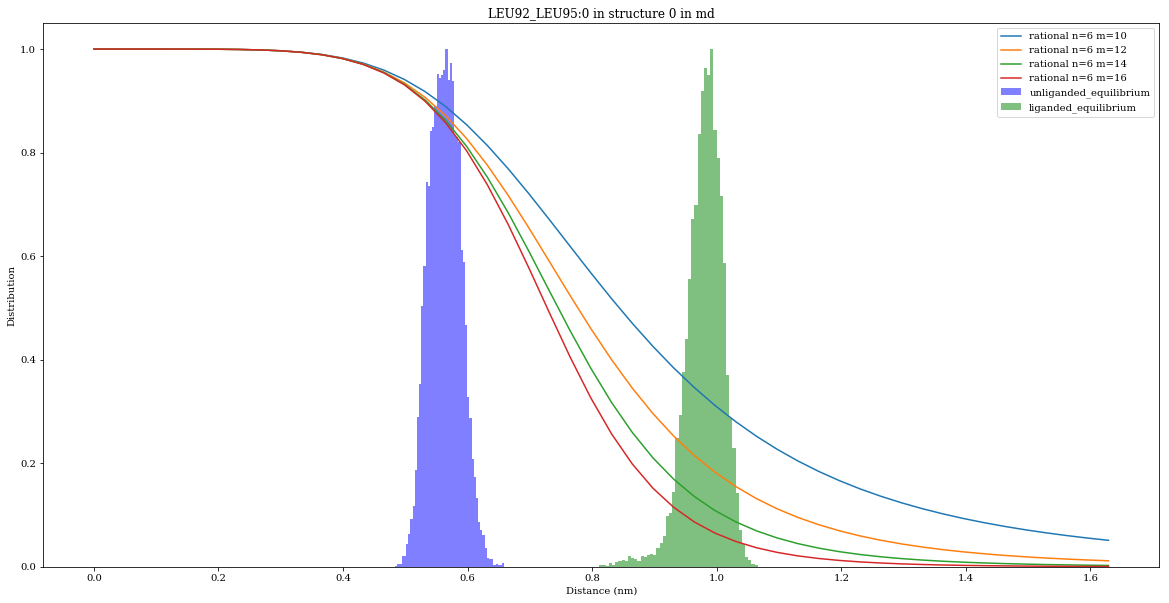

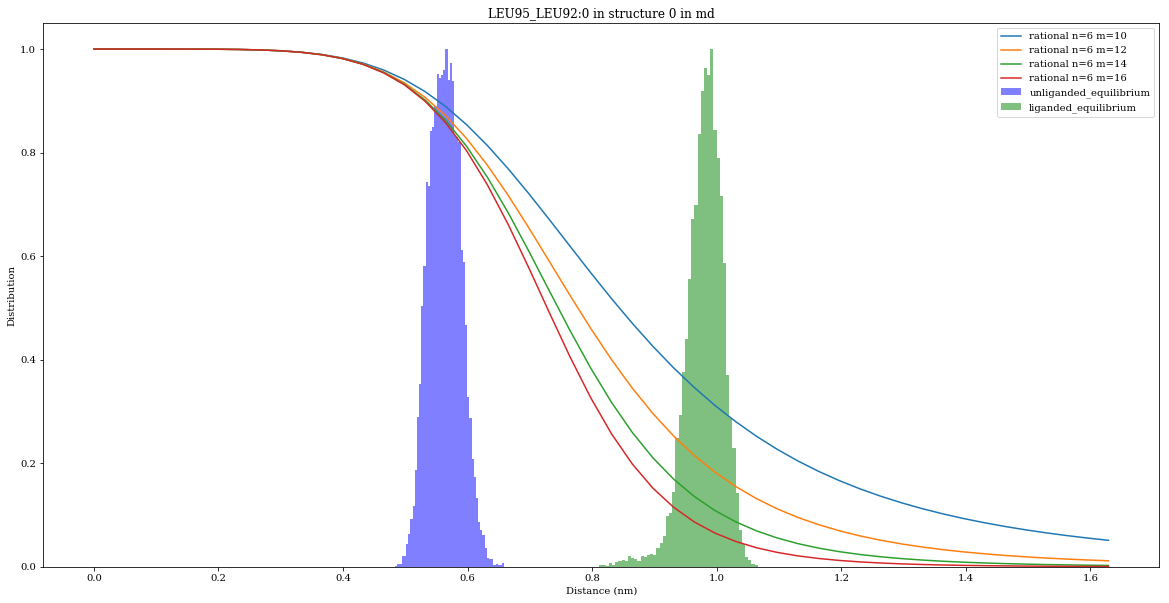

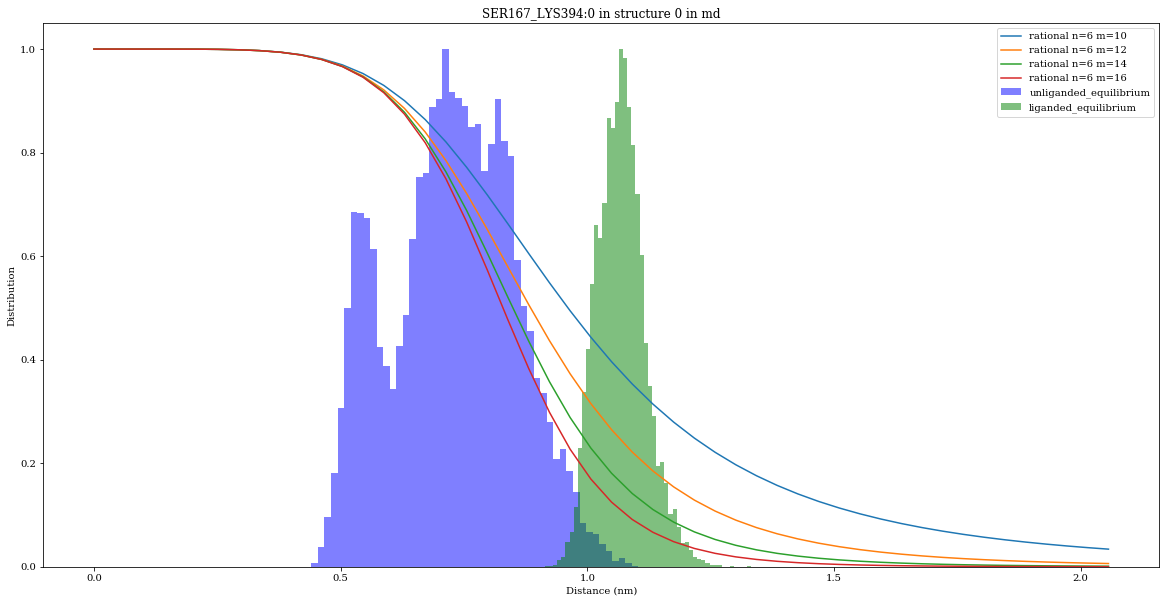

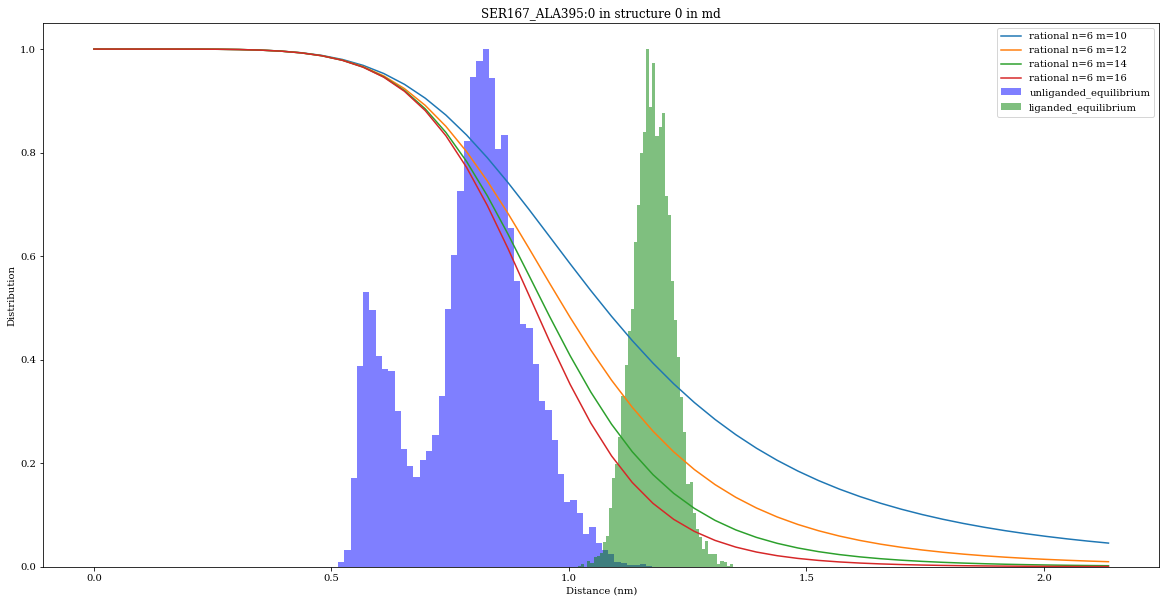

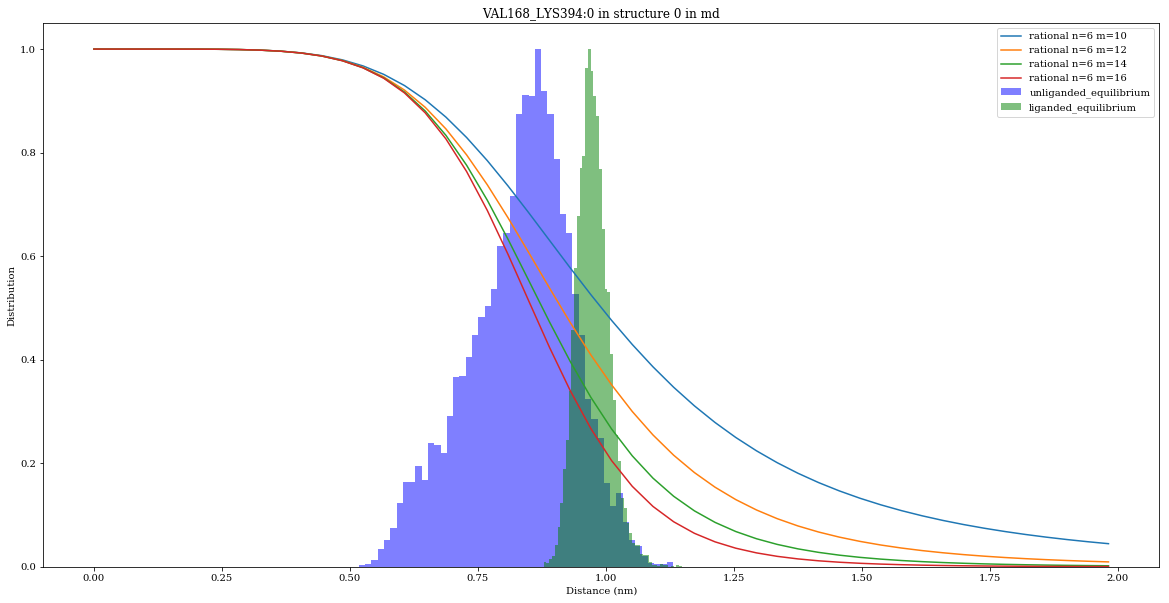

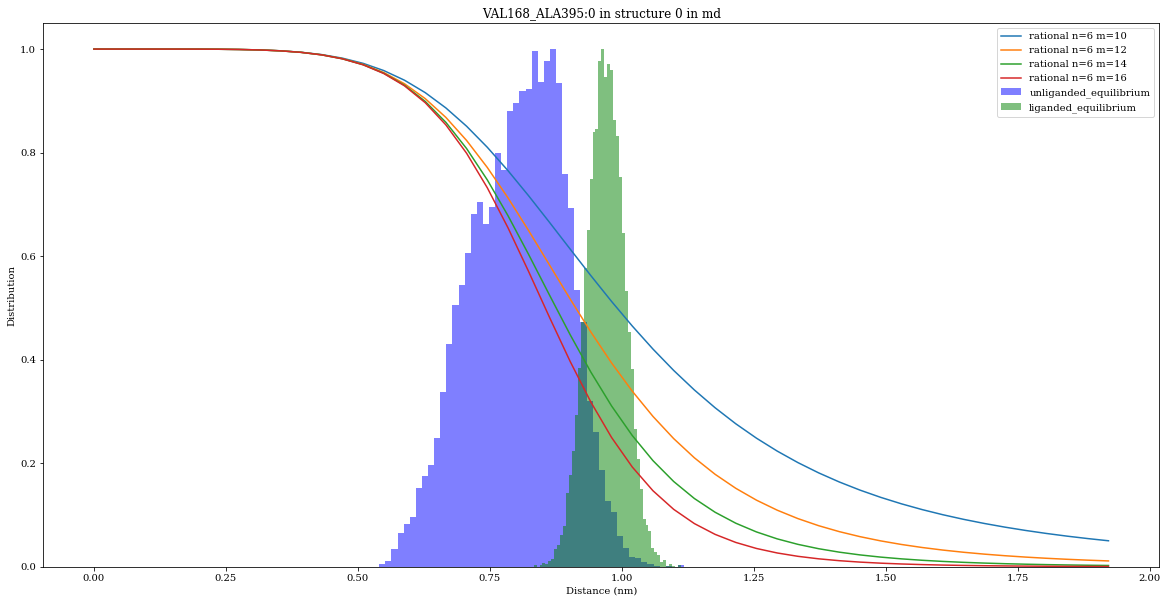

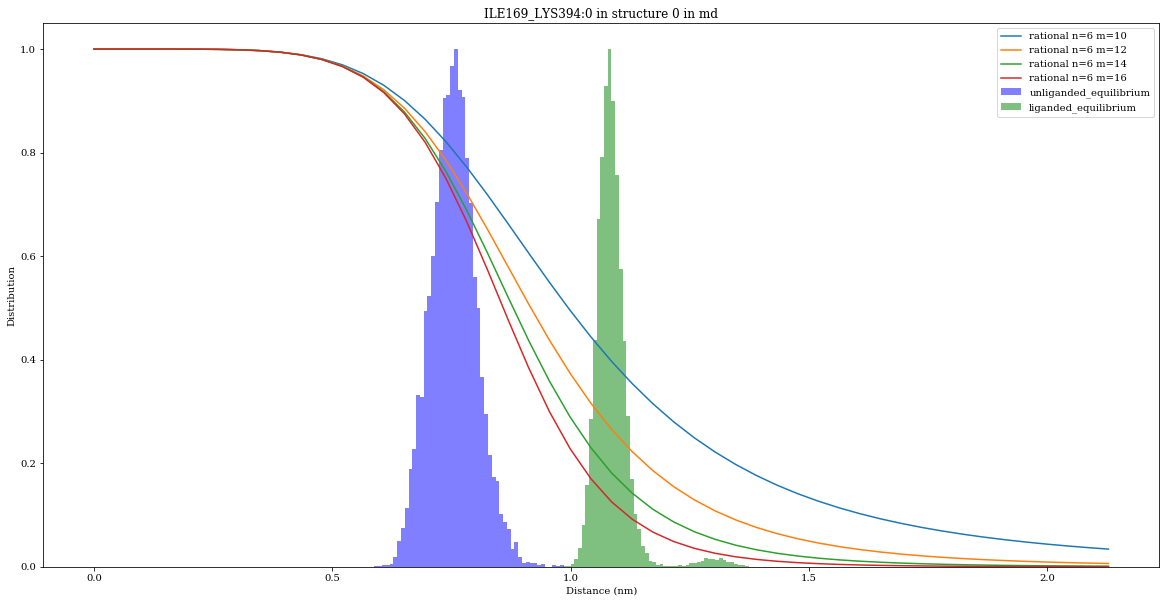

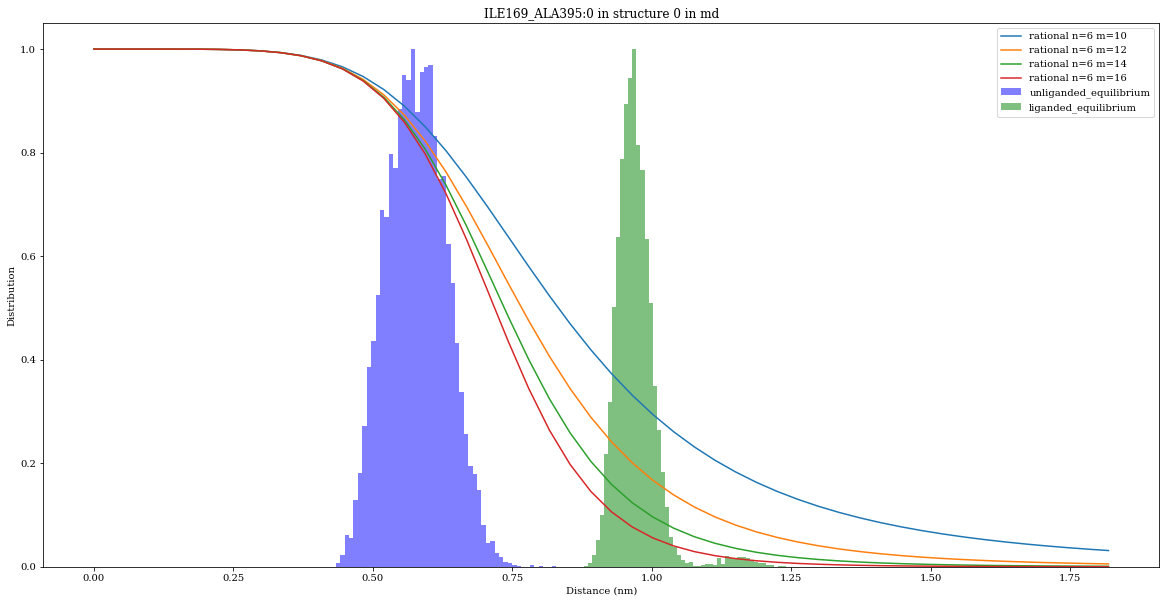

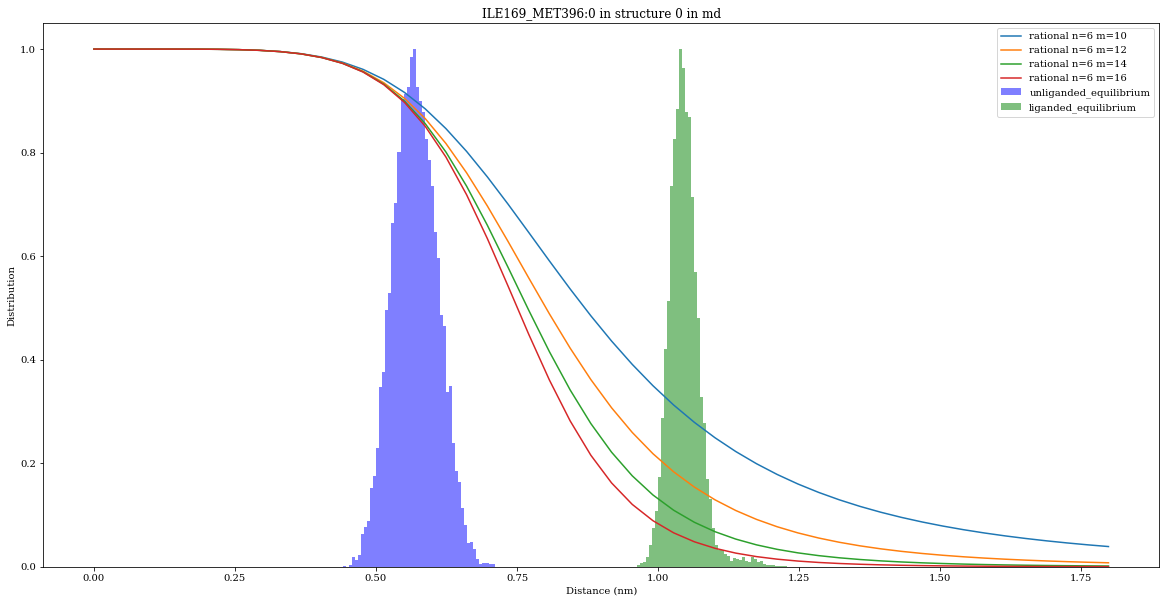

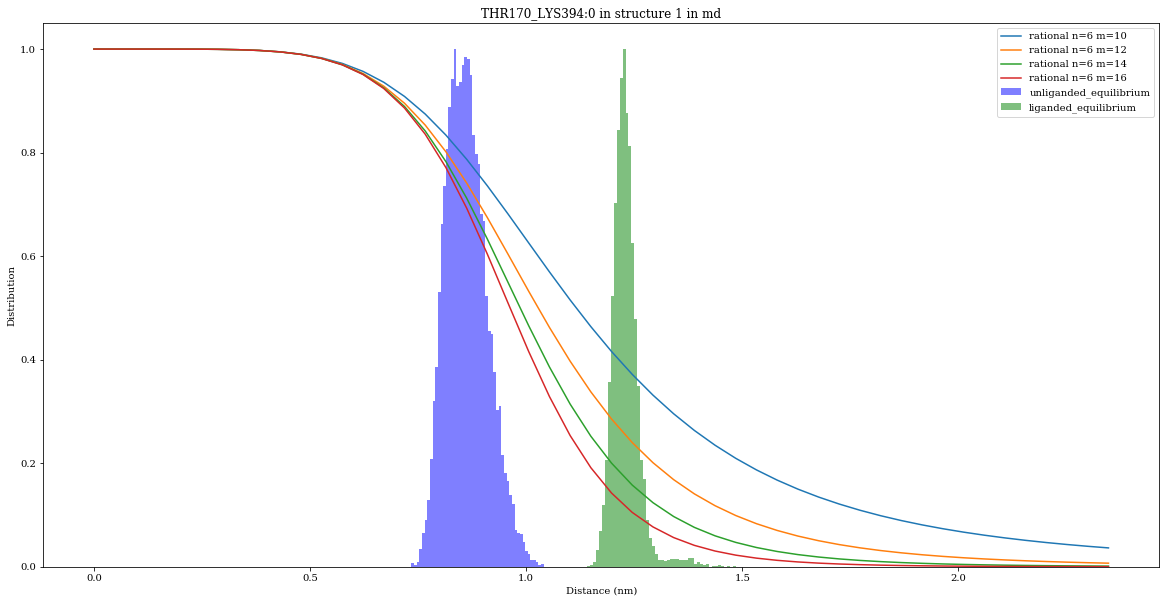

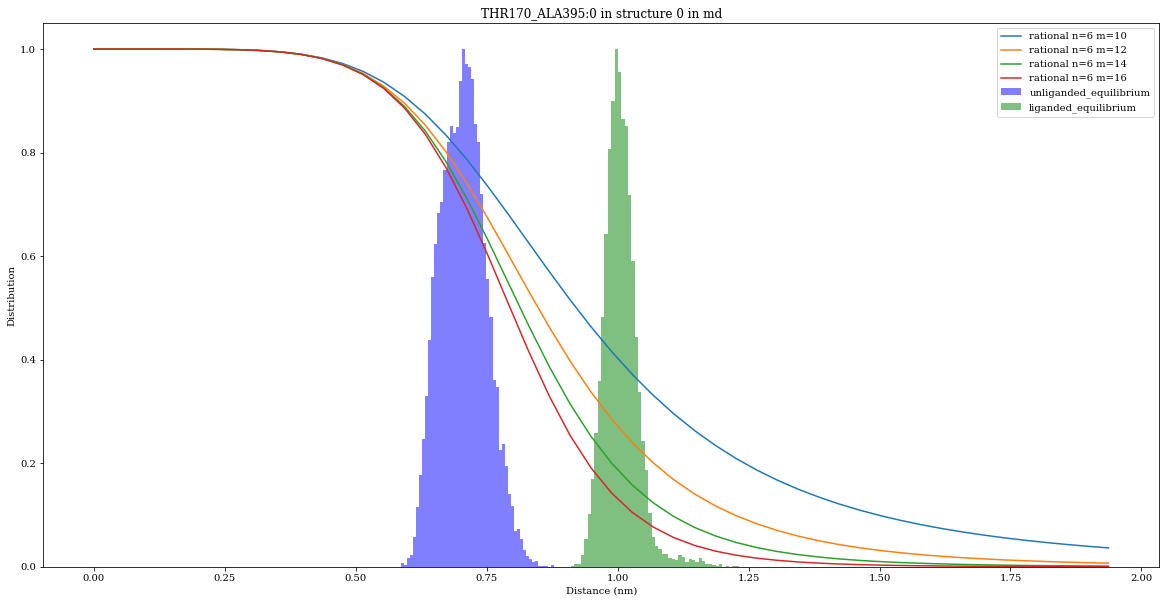

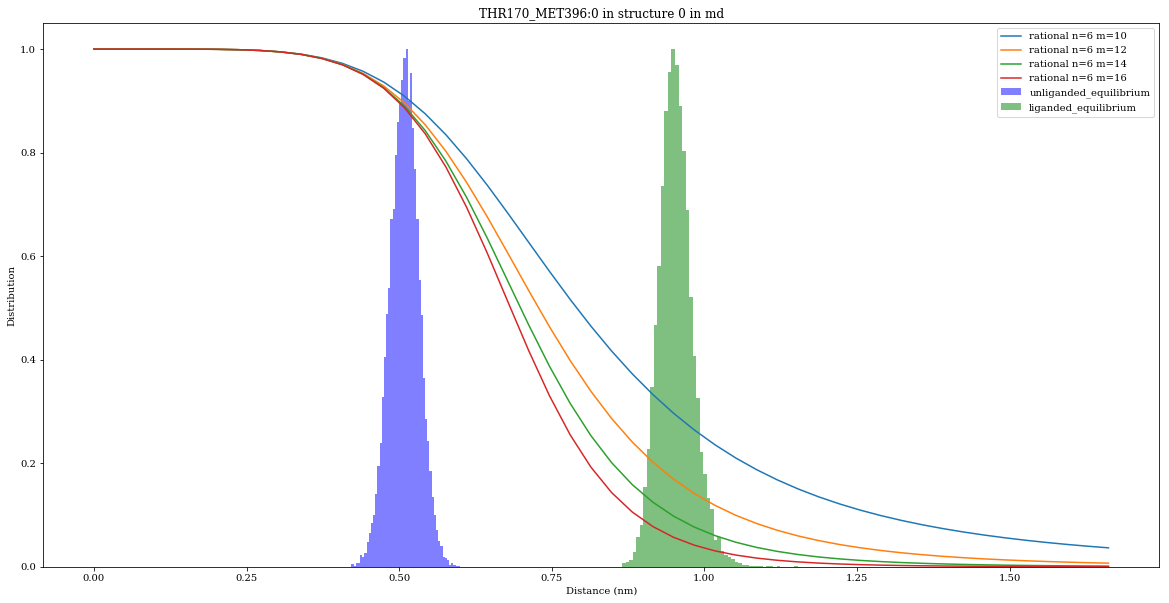

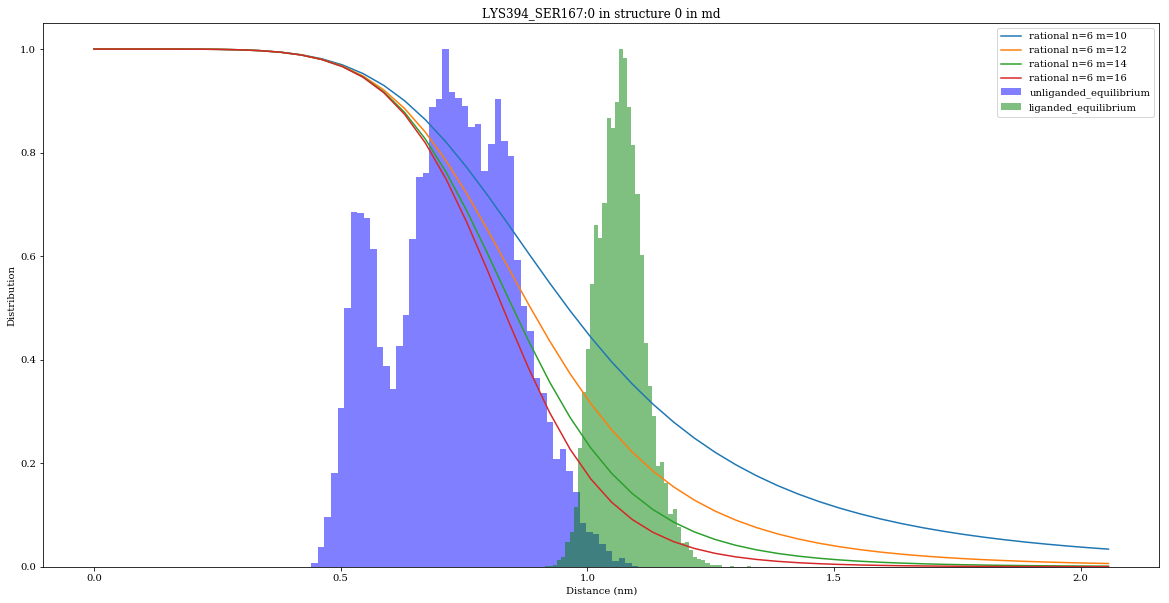

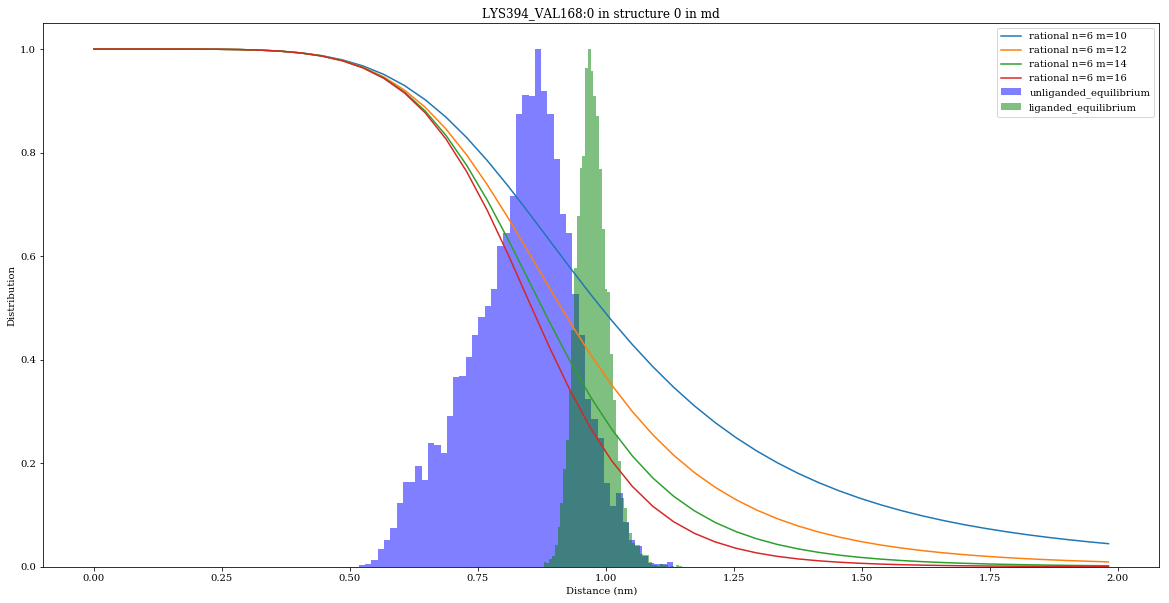

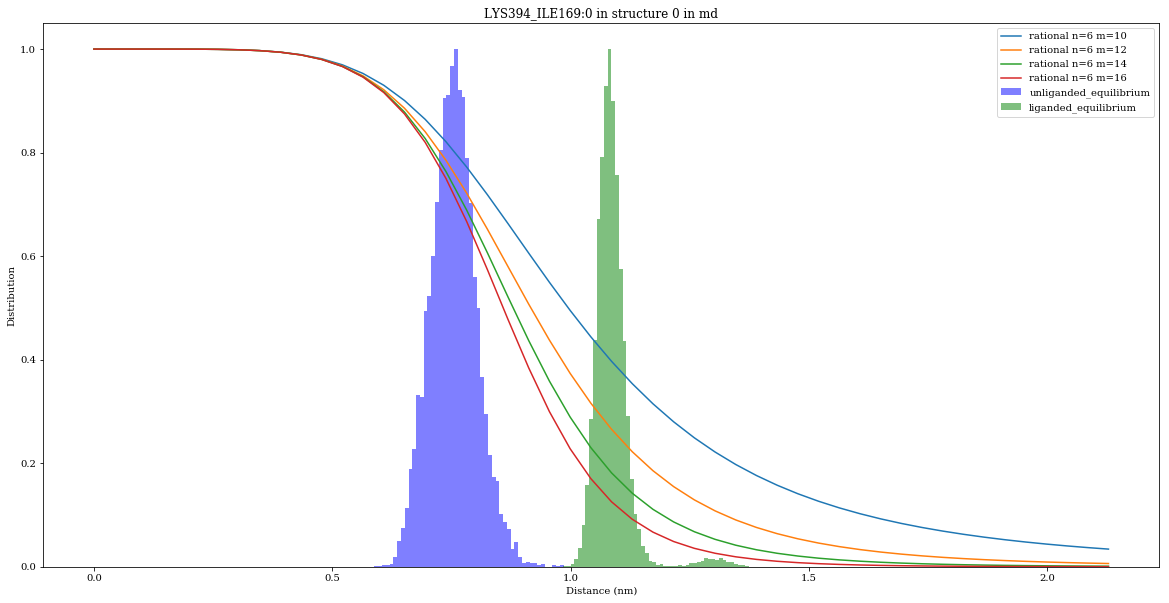

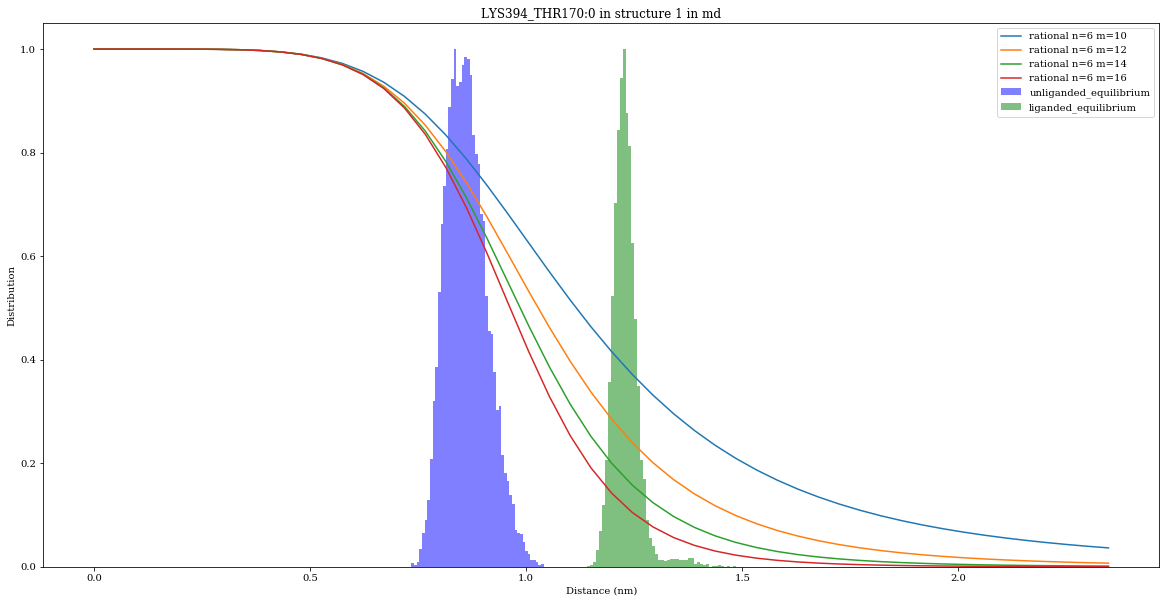

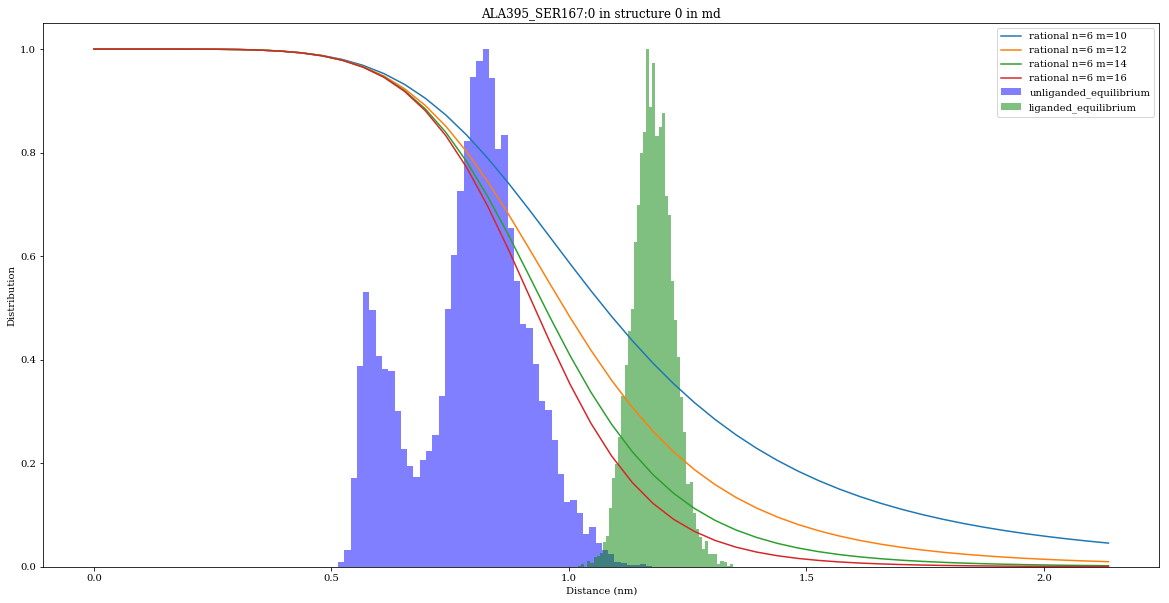

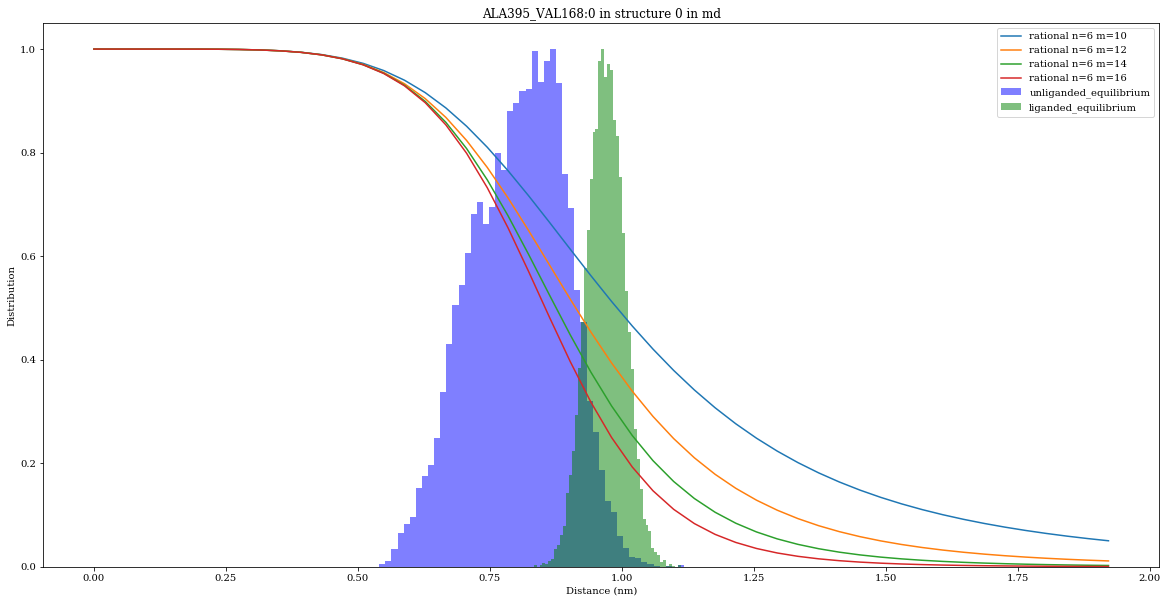

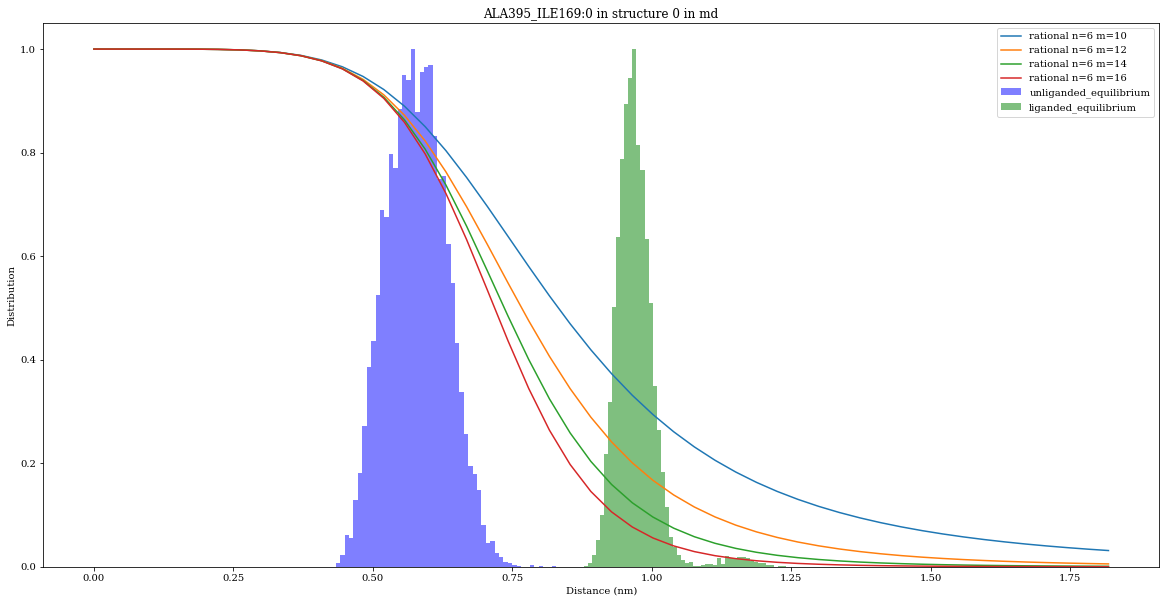

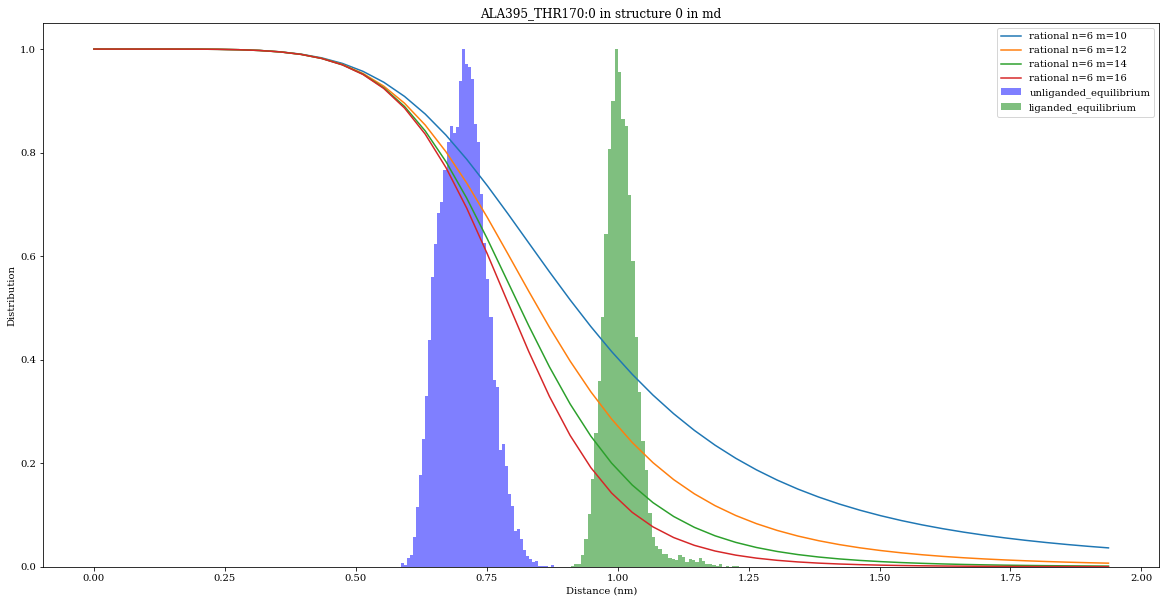

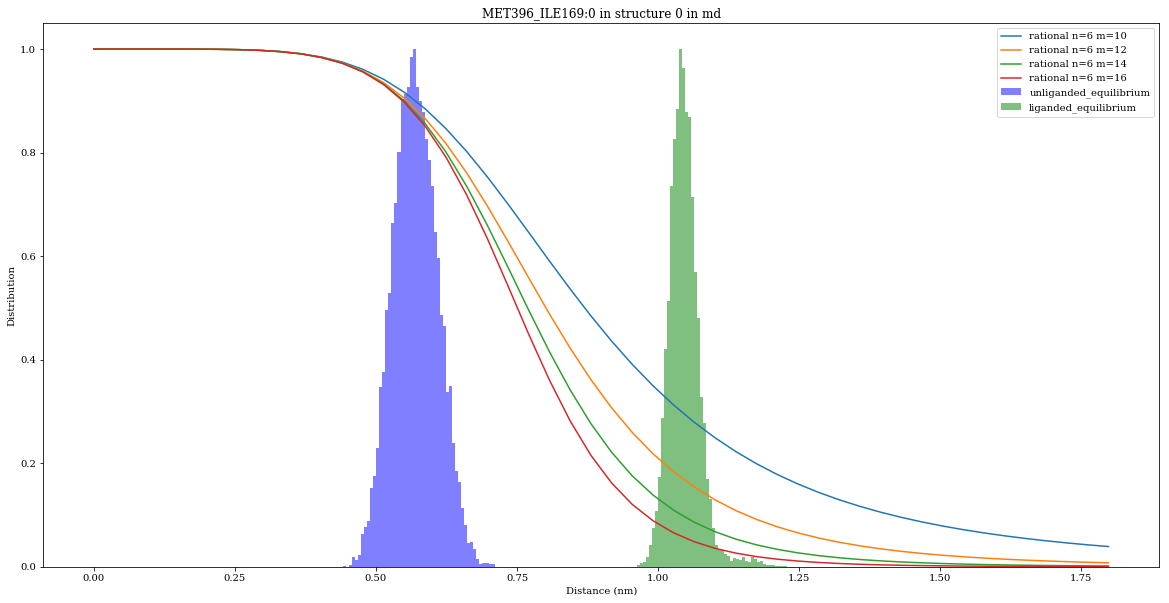

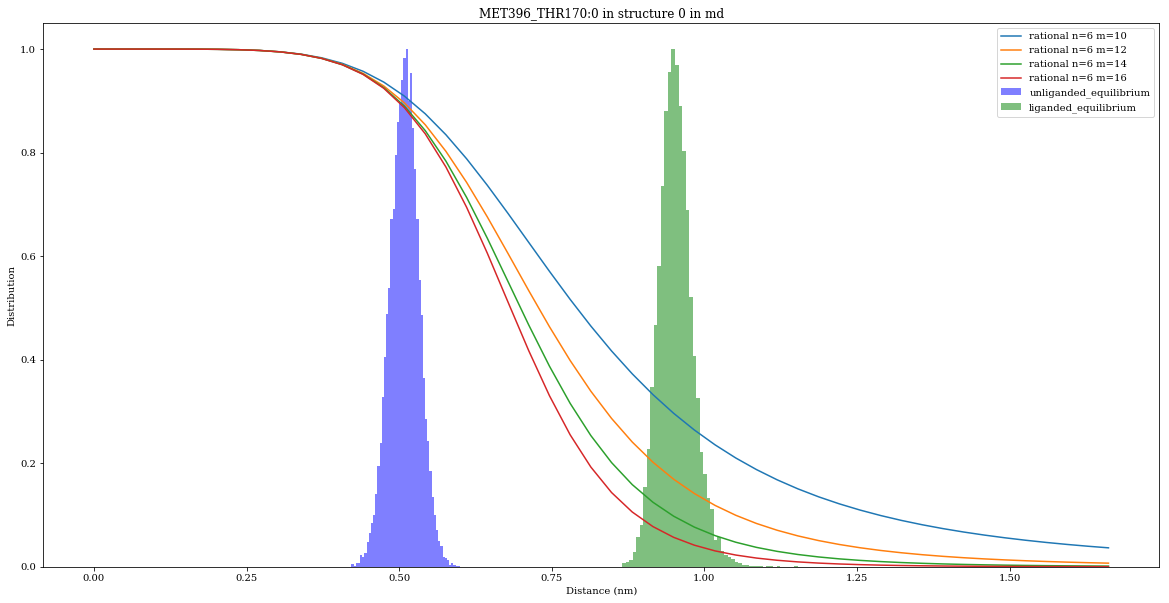

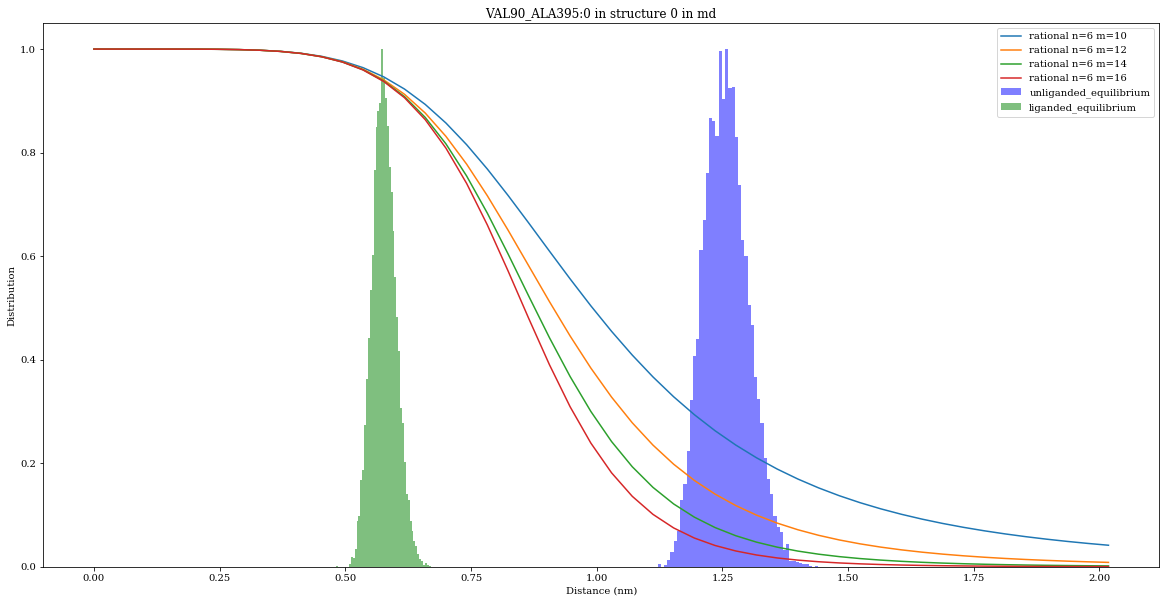

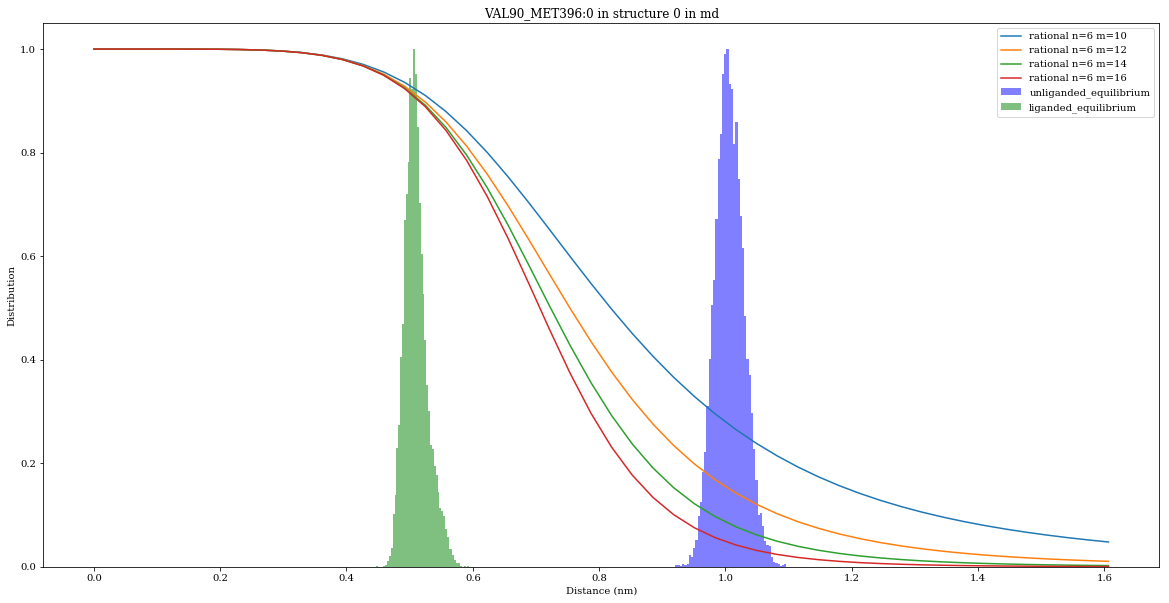

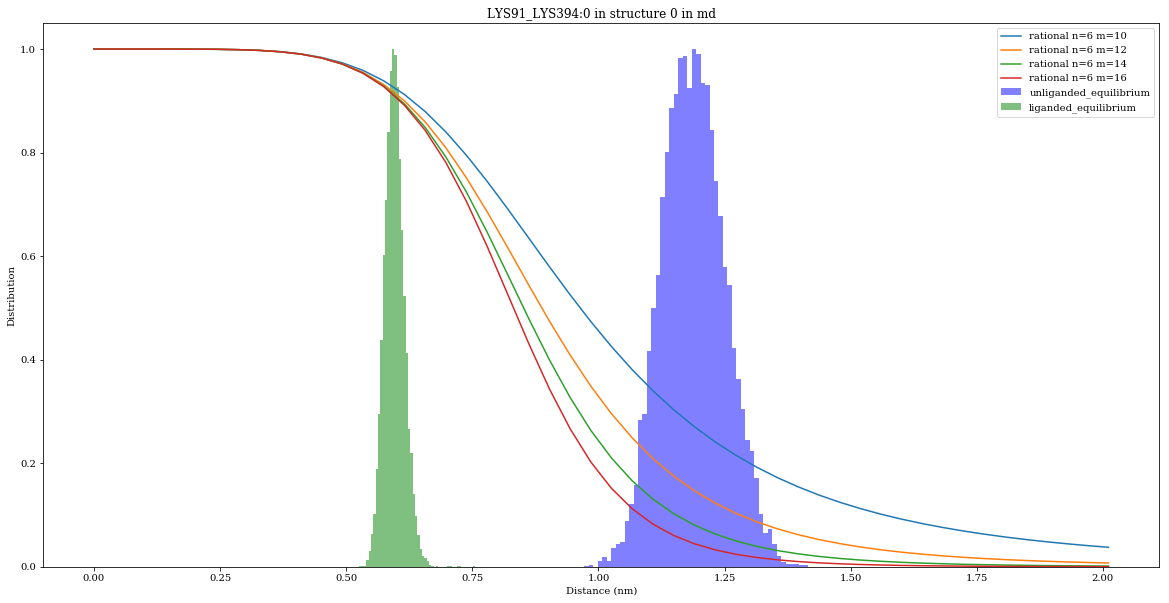

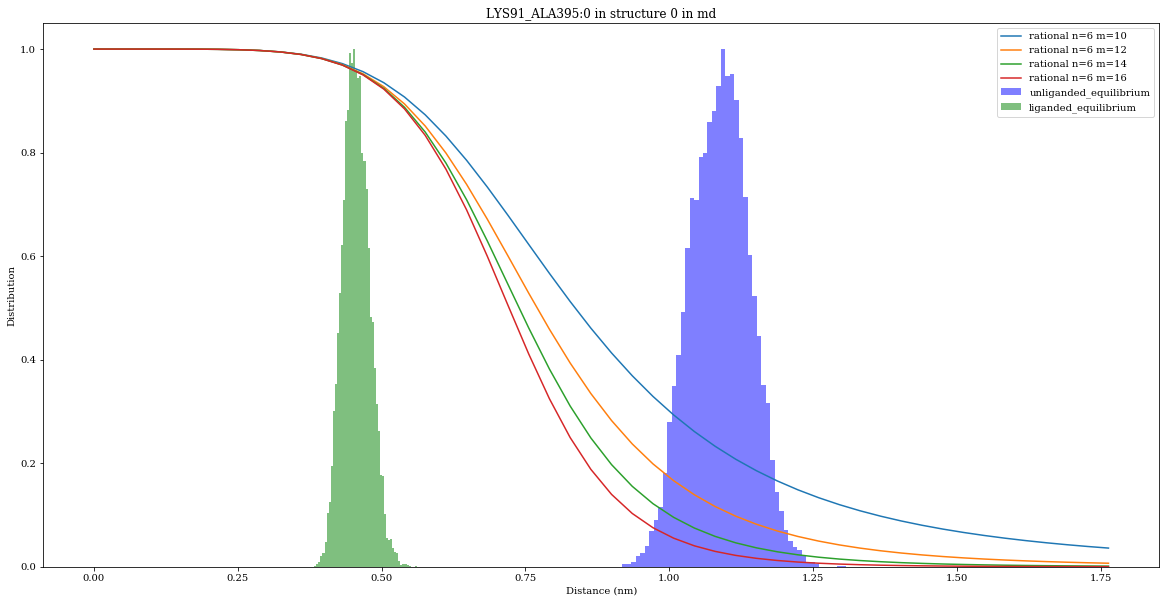

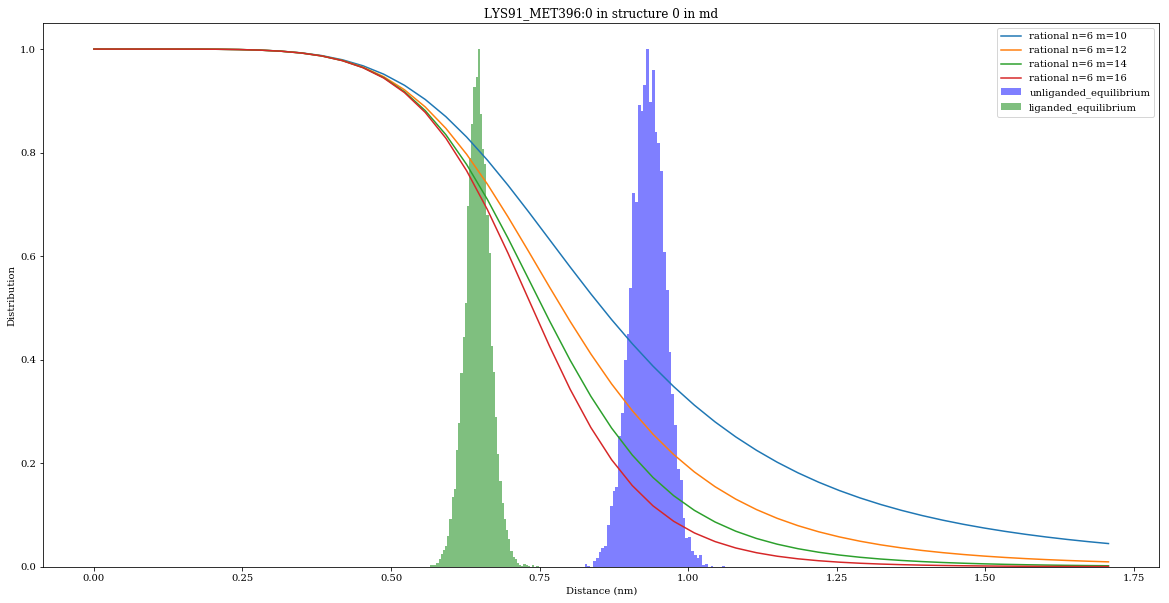

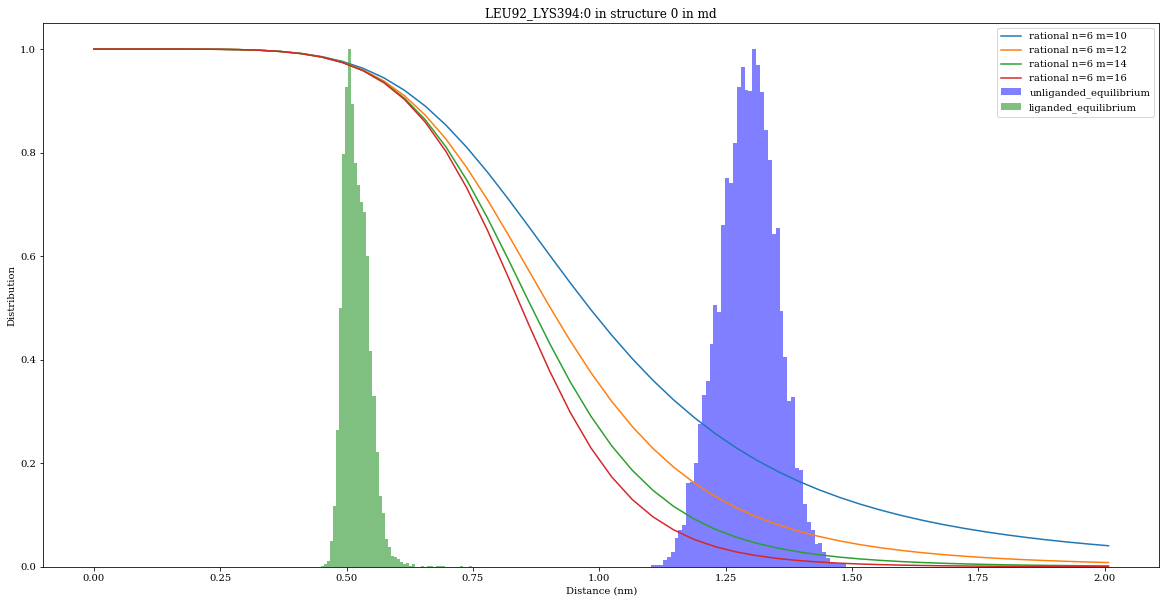

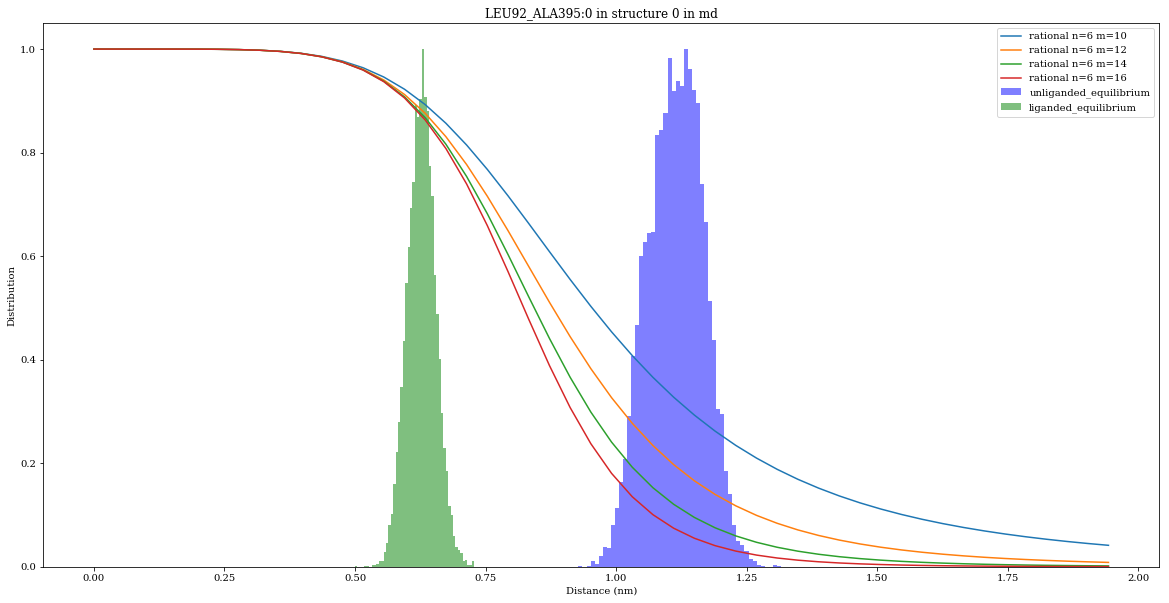

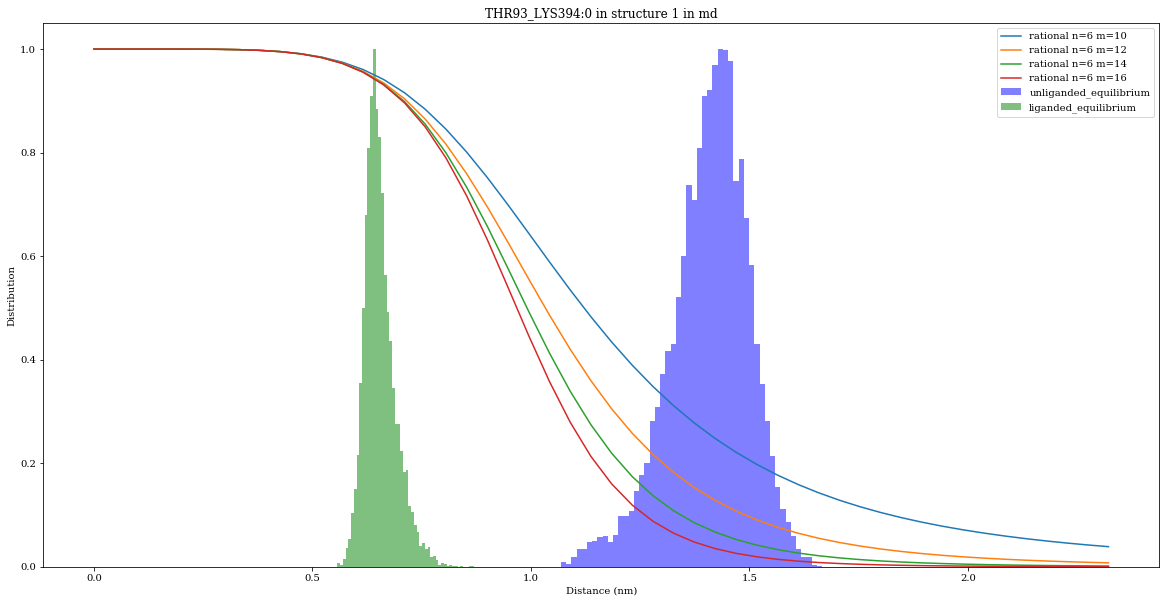

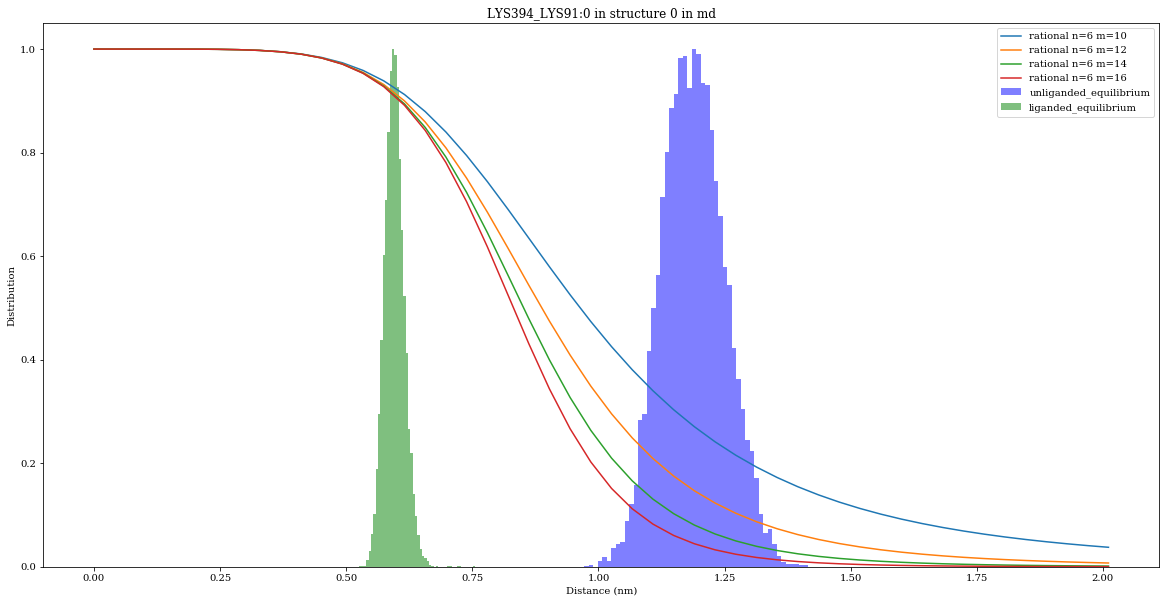

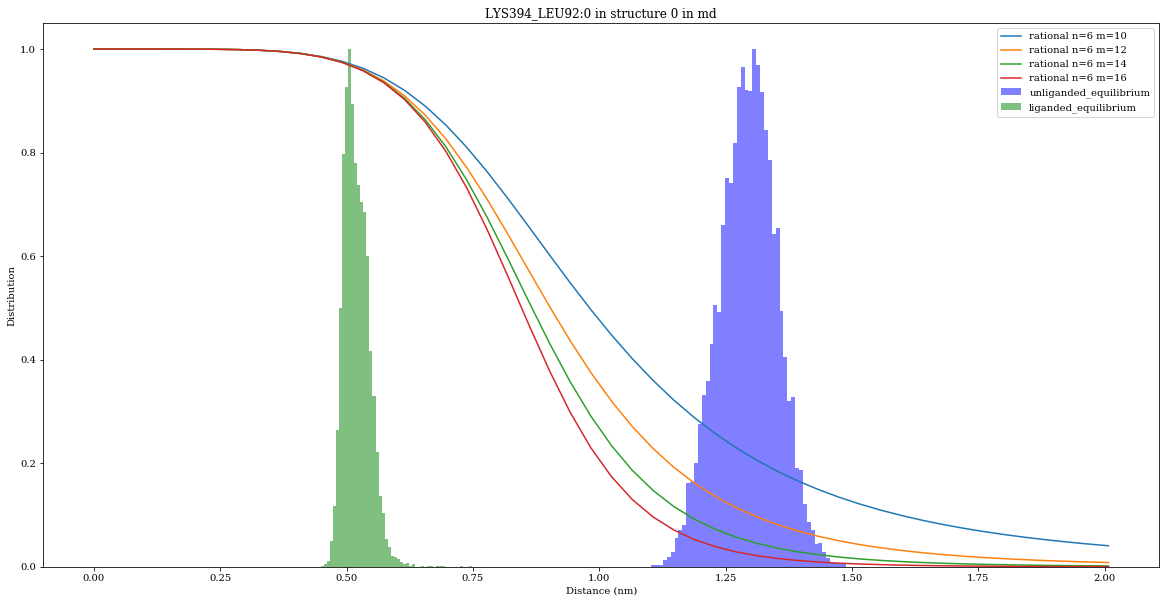

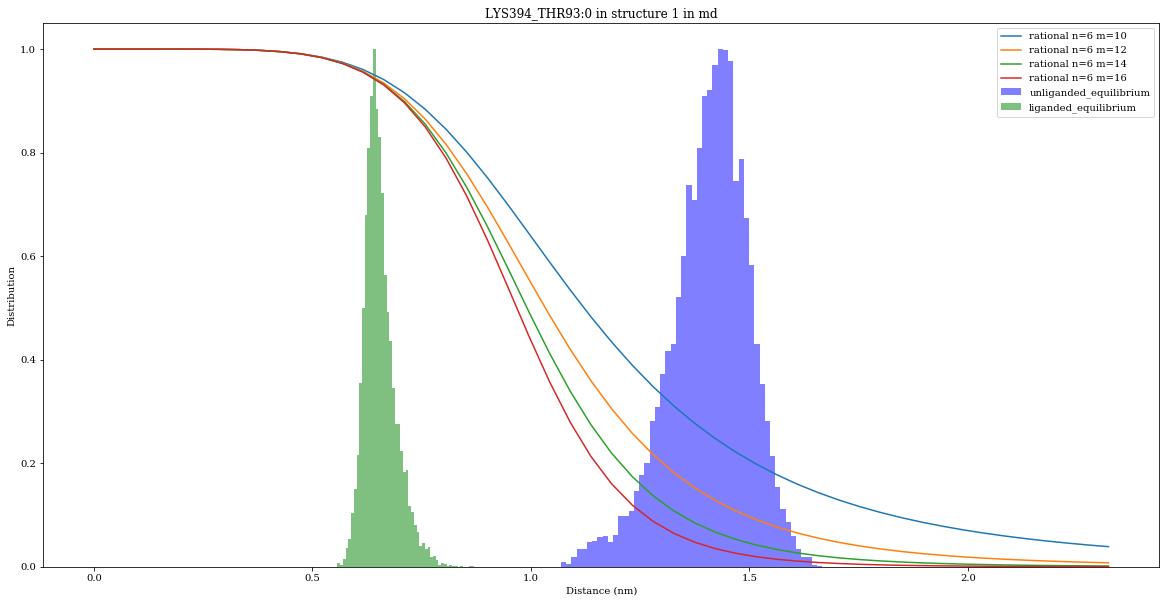

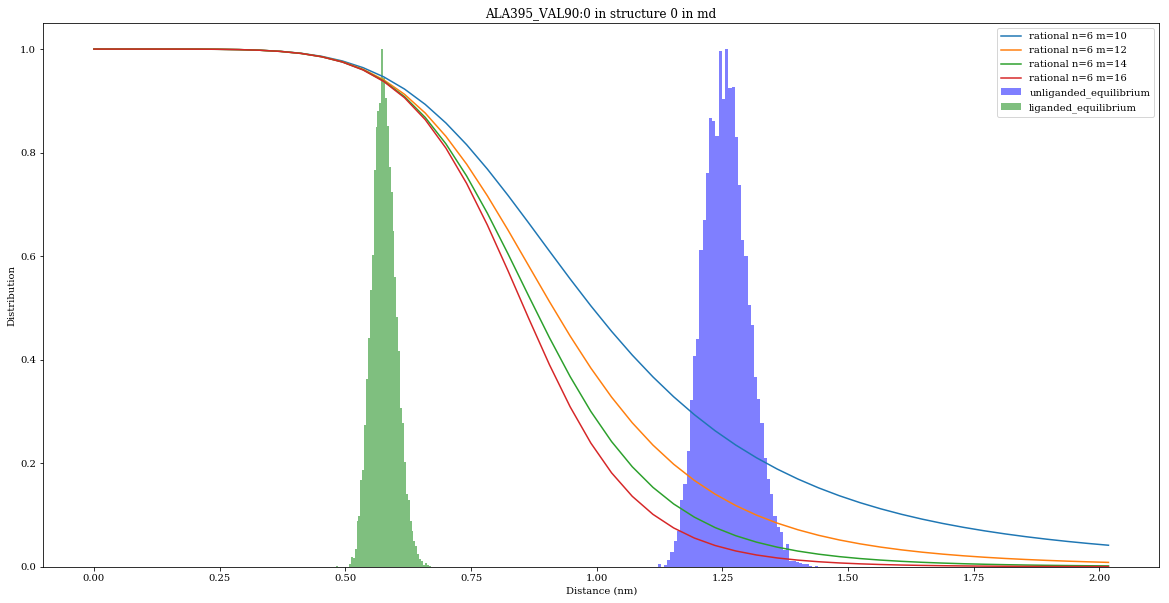

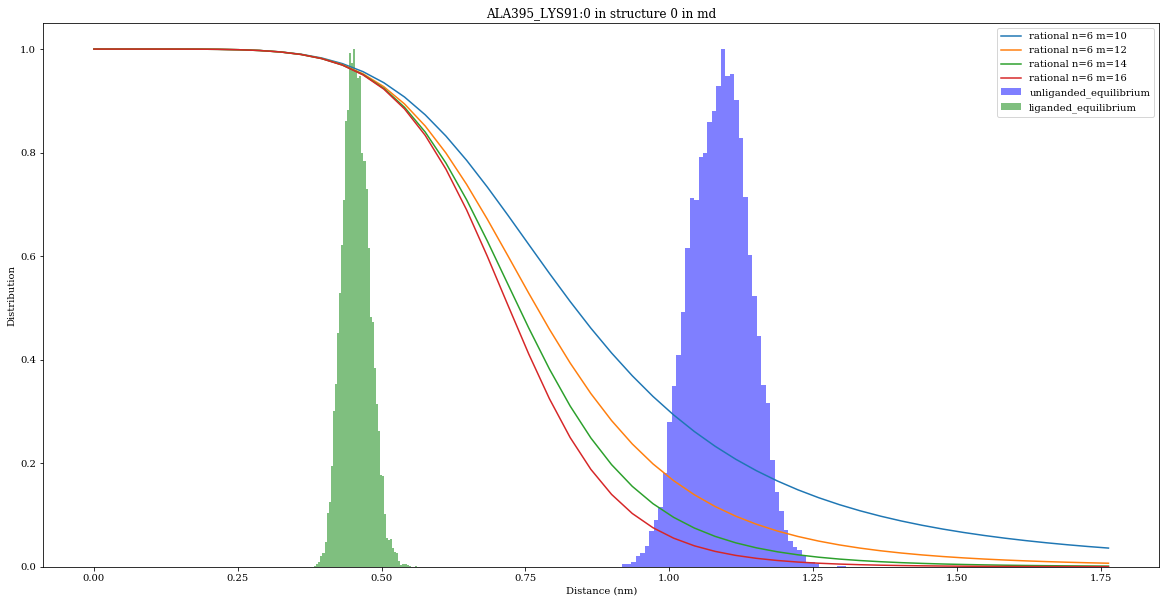

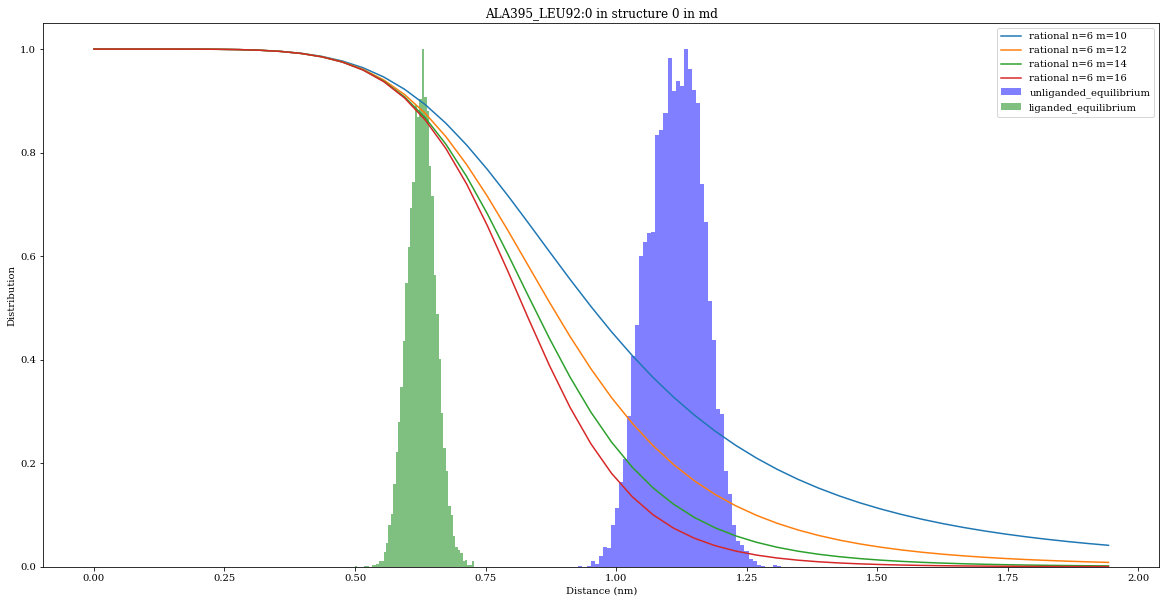

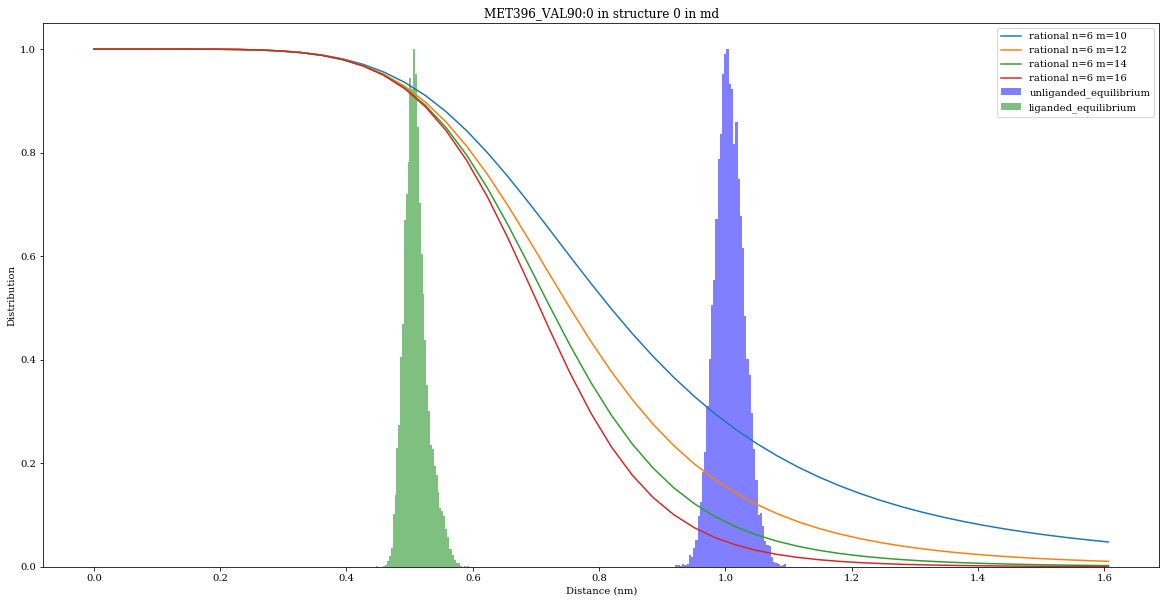

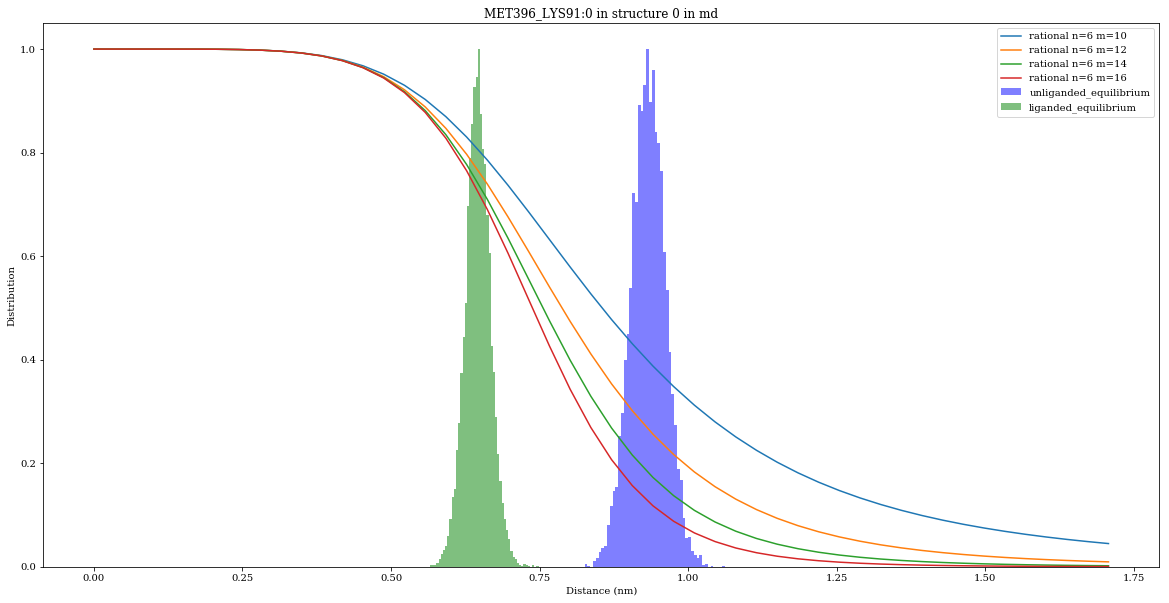

In [38]:
# for i, v in enumerate(hstack((unliganded_pair_i,liganded_pair_i))):
#     atom1 = unliganded.topology.atom(pairs[v][0]).residue.name+str(unliganded.topology.atom(pairs[v][0]).residue.index+1)
#     atom2 = unliganded.topology.atom(pairs[v][1]).residue.name+str(unliganded.topology.atom(pairs[v][1]).residue.index+1)
#     r_0 = (unliganded_dm[0,v]+liganded_dm[0,v])/2
#     r_md = (unlig_d[i+1].mean()+lig_d[i+1].mean())/2
    
#     figure(figsize=(20,10))
#     x_max = max(unlig_d[i+1].max(), lig_d[i+1].max())+min(unlig_d[i+1].mean(),lig_d[i+1].mean())
#     hist, bins = np.histogram(unlig_d[i+1], bins=50, density=True)
#     bar((bins[:-1] + bins[1:])/2, hist/hist.max(), align='center', width=(bins[1]-bins[0]), color='b', alpha=0.5, label='unliganded_equilibrium')
#     unliganded_center = bins[argmax(hist)]

#     hist, bins = np.histogram(lig_d[i+1], bins=50, density=True)
#     bar((bins[:-1] + bins[1:])/2, hist/hist.max(), align='center', width=(bins[1]-bins[0]), color='g', alpha=0.5, label='liganded_equilibrium')
#     liganded_center = bins[argmax(hist)]

#     r = np.linspace(0, x_max)
#     plot(r,rational(r=r, d_0=0, r_0=(unliganded_center+liganded_center)/2, n=6, m=10), label='rational n=6 m=10')
#     plot(r,rational(r=r, d_0=0, r_0=(unliganded_center+liganded_center)/2, n=6, m=12), label='rational n=6 m=12')
#     plot(r,rational(r=r, d_0=0, r_0=(unliganded_center+liganded_center)/2, n=6, m=14), label='rational n=6 m=14')
#     plot(r,rational(r=r, d_0=0, r_0=(unliganded_center+liganded_center)/2, n=6, m=16), label='rational n=6 m=16')

#     xlabel('Distance (nm)')
#     ylabel('Distribution')
#     title(atom1+'_'+atom2+':%d in structure %d in md' % (r_0, r_md))
#     legend()